In [1]:
# import
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
# import rioxarray as rxr
# import xesmf as xe
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')

# import statsmodels.api as smapi
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy 
import matplotlib.colors as mcolors

In [2]:
%cd /N/project/Zli_lab/ERA5_land_data_recalculated/R99pw1hr/wet_hour_prcp
curr_data_path = os.getcwd()

/N/project/Zli_lab/ERA5_land_data_recalculated/R99pw1hr/wet_hour_prcp


In [15]:
# import zipfile
# with zipfile.ZipFile('../ne_110m_admin_0_countries.zip') as z:
#     z.extractall("../ne_110m_admin_0_countries")

In [3]:
def lst(time, long):
    offset = round(long/15)
    lst_time = time + offset
    if lst_time < 0:
        return lst_time + 24
    elif lst_time >= 24:
        return lst_time - 24
    else:
        return lst_time
    
vec_utc_to_lst = np.vectorize(lst)

In [4]:
jja_files = []
for month in range(6,9):
    for year in range(1979,1989):
        filename = f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc"
        jja_files.append(filename)

In [5]:
data = xr.open_mfdataset(jja_files)
data

<xarray.Dataset> Size: 54GB
Dimensions:    (time: 22080, latitude: 261, longitude: 591)
Coordinates:
  * time       (time) datetime64[ns] 177kB 1979-06-01 ... 1988-08-31T23:00:00
  * longitude  (longitude) float32 2kB -125.0 -124.9 -124.8 ... -66.1 -66.0
  * latitude   (latitude) float32 1kB 50.0 49.9 49.8 49.7 ... 24.2 24.1 24.0
Data variables:
    tp         (time, latitude, longitude) float64 27GB dask.array<chunksize=(720, 261, 591), meta=np.ndarray>
    R99pa1hr   (time, latitude, longitude) float64 27GB dask.array<chunksize=(720, 261, 591), meta=np.ndarray>

In [6]:
import fsspec
import geopandas as gpd
import shapely.vectorized


shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
gdf = gpd.read_file(shapefile_path)

# Step 3: Filter the DataFrame for the USA
usa_gdf = gdf[gdf['NAME'] == 'United States of America']
    
xx, yy = np.meshgrid(data.longitude.values, data.latitude.values)

mask = shapely.vectorized.contains(usa_gdf.dissolve().geometry.item(), xx,yy)

In [7]:
def max_prcp_hour(data, long):
    non_null_indices = np.isnan(data.values)
    hours = data.time.dt.hour[~non_null_indices].values
    if len(hours) !=0:
        lst_hours = vec_utc_to_lst(hours, long)
        unique_elements, counts = np.unique(lst_hours, return_counts=True)
        max_count_index = np.argmax(counts)
        return unique_elements[max_count_index]
    else:
        return np.nan

In [16]:
# def max_prcp(data):
#     non_null_indices = np.isnan(data.values)
#     if len(non_null_indices)!=0:
#         extreme_prcp = data[~non_null_indices].values
#         if len(extreme_prcp) != 0:
#             max_extreme_prcp = np.argmax(extreme_prcp)
#             max_extreme_prcp_time = data.time[max_extreme_prcp].dt.hour.values
#             lst_hours = vec_utc_to_lst(max_extreme_prcp_time, long)
#             return lst_hours
#         else:
#             return np.nan
#     else:
#         return np.nan

In [35]:
freq_prcp_hours = []
for i in range(261):
    for j in range(591):
        data_arr = data.R99pa1hr[:,i,j].values
        null_indices = np.isnan(data_arr)
        if len(null_indices)!=0:
            extreme_prcp = data_arr[~null_indices]
            if len(extreme_prcp) != 0:
                max_extreme_prcp = np.argmax(extreme_prcp)
                max_extreme_prcp_time = data.R99pa1hr[:,i,j].time[max_extreme_prcp].dt.hour.values
                lst_hours = vec_utc_to_lst(max_extreme_prcp_time, data.R99pa1hr[:,i,j].longitude)
            else:
                lst_hours = np.nan
        else:
            lst_hours = np.nan
        freq_prcp_hours.append(lst_hours)
        print(i,j)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


2 243
2 244
2 245
2 246
2 247
2 248
2 249
2 250
2 251
2 252
2 253
2 254
2 255
2 256
2 257
2 258
2 259
2 260
2 261
2 262
2 263
2 264
2 265
2 266
2 267
2 268
2 269
2 270
2 271
2 272
2 273
2 274
2 275
2 276
2 277
2 278
2 279
2 280
2 281
2 282
2 283
2 284
2 285
2 286
2 287
2 288
2 289
2 290
2 291
2 292
2 293
2 294
2 295
2 296
2 297
2 298
2 299
2 300
2 301
2 302
2 303
2 304
2 305
2 306
2 307
2 308
2 309
2 310
2 311
2 312
2 313
2 314
2 315
2 316
2 317
2 318
2 319
2 320
2 321
2 322
2 323
2 324
2 325
2 326
2 327
2 328
2 329
2 330
2 331
2 332
2 333
2 334
2 335
2 336
2 337
2 338
2 339
2 340
2 341
2 342
2 343
2 344
2 345
2 346
2 347
2 348
2 349
2 350
2 351
2 352
2 353
2 354
2 355
2 356
2 357
2 358
2 359
2 360
2 361
2 362
2 363
2 364
2 365
2 366
2 367
2 368
2 369
2 370
2 371
2 372
2 373
2 374
2 375
2 376
2 377
2 378
2 379
2 380
2 381
2 382
2 383
2 384
2 385
2 386
2 387
2 388
2 389
2 390
2 391
2 392
2 393
2 394
2 395
2 396
2 397
2 398
2 399
2 400
2 401
2 402
2 403
2 404
2 405
2 406
2 407
2 408
2 40

4 464
4 465
4 466
4 467
4 468
4 469
4 470
4 471
4 472
4 473
4 474
4 475
4 476
4 477
4 478
4 479
4 480
4 481
4 482
4 483
4 484
4 485
4 486
4 487
4 488
4 489
4 490
4 491
4 492
4 493
4 494
4 495
4 496
4 497
4 498
4 499
4 500
4 501
4 502
4 503
4 504
4 505
4 506
4 507
4 508
4 509
4 510
4 511
4 512
4 513
4 514
4 515
4 516
4 517
4 518
4 519
4 520
4 521
4 522
4 523
4 524
4 525
4 526
4 527
4 528
4 529
4 530
4 531
4 532
4 533
4 534
4 535
4 536
4 537
4 538
4 539
4 540
4 541
4 542
4 543
4 544
4 545
4 546
4 547
4 548
4 549
4 550
4 551
4 552
4 553
4 554
4 555
4 556
4 557
4 558
4 559
4 560
4 561
4 562
4 563
4 564
4 565
4 566
4 567
4 568
4 569
4 570
4 571
4 572
4 573
4 574
4 575
4 576
4 577
4 578
4 579
4 580
4 581
4 582
4 583
4 584
4 585
4 586
4 587
4 588
4 589
4 590
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 45
5 46
5 47
5 48
5 4

7 115
7 116
7 117
7 118
7 119
7 120
7 121
7 122
7 123
7 124
7 125
7 126
7 127
7 128
7 129
7 130
7 131
7 132
7 133
7 134
7 135
7 136
7 137
7 138
7 139
7 140
7 141
7 142
7 143
7 144
7 145
7 146
7 147
7 148
7 149
7 150
7 151
7 152
7 153
7 154
7 155
7 156
7 157
7 158
7 159
7 160
7 161
7 162
7 163
7 164
7 165
7 166
7 167
7 168
7 169
7 170
7 171
7 172
7 173
7 174
7 175
7 176
7 177
7 178
7 179
7 180
7 181
7 182
7 183
7 184
7 185
7 186
7 187
7 188
7 189
7 190
7 191
7 192
7 193
7 194
7 195
7 196
7 197
7 198
7 199
7 200
7 201
7 202
7 203
7 204
7 205
7 206
7 207
7 208
7 209
7 210
7 211
7 212
7 213
7 214
7 215
7 216
7 217
7 218
7 219
7 220
7 221
7 222
7 223
7 224
7 225
7 226
7 227
7 228
7 229
7 230
7 231
7 232
7 233
7 234
7 235
7 236
7 237
7 238
7 239
7 240
7 241
7 242
7 243
7 244
7 245
7 246
7 247
7 248
7 249
7 250
7 251
7 252
7 253
7 254
7 255
7 256
7 257
7 258
7 259
7 260
7 261
7 262
7 263
7 264
7 265
7 266
7 267
7 268
7 269
7 270
7 271
7 272
7 273
7 274
7 275
7 276
7 277
7 278
7 279
7 280
7 28

9 337
9 338
9 339
9 340
9 341
9 342
9 343
9 344
9 345
9 346
9 347
9 348
9 349
9 350
9 351
9 352
9 353
9 354
9 355
9 356
9 357
9 358
9 359
9 360
9 361
9 362
9 363
9 364
9 365
9 366
9 367
9 368
9 369
9 370
9 371
9 372
9 373
9 374
9 375
9 376
9 377
9 378
9 379
9 380
9 381
9 382
9 383
9 384
9 385
9 386
9 387
9 388
9 389
9 390
9 391
9 392
9 393
9 394
9 395
9 396
9 397
9 398
9 399
9 400
9 401
9 402
9 403
9 404
9 405
9 406
9 407
9 408
9 409
9 410
9 411
9 412
9 413
9 414
9 415
9 416
9 417
9 418
9 419
9 420
9 421
9 422
9 423
9 424
9 425
9 426
9 427
9 428
9 429
9 430
9 431
9 432
9 433
9 434
9 435
9 436
9 437
9 438
9 439
9 440
9 441
9 442
9 443
9 444
9 445
9 446
9 447
9 448
9 449
9 450
9 451
9 452
9 453
9 454
9 455
9 456
9 457
9 458
9 459
9 460
9 461
9 462
9 463
9 464
9 465
9 466
9 467
9 468
9 469
9 470
9 471
9 472
9 473
9 474
9 475
9 476
9 477
9 478
9 479
9 480
9 481
9 482
9 483
9 484
9 485
9 486
9 487
9 488
9 489
9 490
9 491
9 492
9 493
9 494
9 495
9 496
9 497
9 498
9 499
9 500
9 501
9 502
9 50

11 398
11 399
11 400
11 401
11 402
11 403
11 404
11 405
11 406
11 407
11 408
11 409
11 410
11 411
11 412
11 413
11 414
11 415
11 416
11 417
11 418
11 419
11 420
11 421
11 422
11 423
11 424
11 425
11 426
11 427
11 428
11 429
11 430
11 431
11 432
11 433
11 434
11 435
11 436
11 437
11 438
11 439
11 440
11 441
11 442
11 443
11 444
11 445
11 446
11 447
11 448
11 449
11 450
11 451
11 452
11 453
11 454
11 455
11 456
11 457
11 458
11 459
11 460
11 461
11 462
11 463
11 464
11 465
11 466
11 467
11 468
11 469
11 470
11 471
11 472
11 473
11 474
11 475
11 476
11 477
11 478
11 479
11 480
11 481
11 482
11 483
11 484
11 485
11 486
11 487
11 488
11 489
11 490
11 491
11 492
11 493
11 494
11 495
11 496
11 497
11 498
11 499
11 500
11 501
11 502
11 503
11 504
11 505
11 506
11 507
11 508
11 509
11 510
11 511
11 512
11 513
11 514
11 515
11 516
11 517
11 518
11 519
11 520
11 521
11 522
11 523
11 524
11 525
11 526
11 527
11 528
11 529
11 530
11 531
11 532
11 533
11 534
11 535
11 536
11 537
11 538
11 539
11 540

13 420
13 421
13 422
13 423
13 424
13 425
13 426
13 427
13 428
13 429
13 430
13 431
13 432
13 433
13 434
13 435
13 436
13 437
13 438
13 439
13 440
13 441
13 442
13 443
13 444
13 445
13 446
13 447
13 448
13 449
13 450
13 451
13 452
13 453
13 454
13 455
13 456
13 457
13 458
13 459
13 460
13 461
13 462
13 463
13 464
13 465
13 466
13 467
13 468
13 469
13 470
13 471
13 472
13 473
13 474
13 475
13 476
13 477
13 478
13 479
13 480
13 481
13 482
13 483
13 484
13 485
13 486
13 487
13 488
13 489
13 490
13 491
13 492
13 493
13 494
13 495
13 496
13 497
13 498
13 499
13 500
13 501
13 502
13 503
13 504
13 505
13 506
13 507
13 508
13 509
13 510
13 511
13 512
13 513
13 514
13 515
13 516
13 517
13 518
13 519
13 520
13 521
13 522
13 523
13 524
13 525
13 526
13 527
13 528
13 529
13 530
13 531
13 532
13 533
13 534
13 535
13 536
13 537
13 538
13 539
13 540
13 541
13 542
13 543
13 544
13 545
13 546
13 547
13 548
13 549
13 550
13 551
13 552
13 553
13 554
13 555
13 556
13 557
13 558
13 559
13 560
13 561
13 562

15 444
15 445
15 446
15 447
15 448
15 449
15 450
15 451
15 452
15 453
15 454
15 455
15 456
15 457
15 458
15 459
15 460
15 461
15 462
15 463
15 464
15 465
15 466
15 467
15 468
15 469
15 470
15 471
15 472
15 473
15 474
15 475
15 476
15 477
15 478
15 479
15 480
15 481
15 482
15 483
15 484
15 485
15 486
15 487
15 488
15 489
15 490
15 491
15 492
15 493
15 494
15 495
15 496
15 497
15 498
15 499
15 500
15 501
15 502
15 503
15 504
15 505
15 506
15 507
15 508
15 509
15 510
15 511
15 512
15 513
15 514
15 515
15 516
15 517
15 518
15 519
15 520
15 521
15 522
15 523
15 524
15 525
15 526
15 527
15 528
15 529
15 530
15 531
15 532
15 533
15 534
15 535
15 536
15 537
15 538
15 539
15 540
15 541
15 542
15 543
15 544
15 545
15 546
15 547
15 548
15 549
15 550
15 551
15 552
15 553
15 554
15 555
15 556
15 557
15 558
15 559
15 560
15 561
15 562
15 563
15 564
15 565
15 566
15 567
15 568
15 569
15 570
15 571
15 572
15 573
15 574
15 575
15 576
15 577
15 578
15 579
15 580
15 581
15 582
15 583
15 584
15 585
15 586

17 469
17 470
17 471
17 472
17 473
17 474
17 475
17 476
17 477
17 478
17 479
17 480
17 481
17 482
17 483
17 484
17 485
17 486
17 487
17 488
17 489
17 490
17 491
17 492
17 493
17 494
17 495
17 496
17 497
17 498
17 499
17 500
17 501
17 502
17 503
17 504
17 505
17 506
17 507
17 508
17 509
17 510
17 511
17 512
17 513
17 514
17 515
17 516
17 517
17 518
17 519
17 520
17 521
17 522
17 523
17 524
17 525
17 526
17 527
17 528
17 529
17 530
17 531
17 532
17 533
17 534
17 535
17 536
17 537
17 538
17 539
17 540
17 541
17 542
17 543
17 544
17 545
17 546
17 547
17 548
17 549
17 550
17 551
17 552
17 553
17 554
17 555
17 556
17 557
17 558
17 559
17 560
17 561
17 562
17 563
17 564
17 565
17 566
17 567
17 568
17 569
17 570
17 571
17 572
17 573
17 574
17 575
17 576
17 577
17 578
17 579
17 580
17 581
17 582
17 583
17 584
17 585
17 586
17 587
17 588
17 589
17 590
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
18 24
18 25


19 493
19 494
19 495
19 496
19 497
19 498
19 499
19 500
19 501
19 502
19 503
19 504
19 505
19 506
19 507
19 508
19 509
19 510
19 511
19 512
19 513
19 514
19 515
19 516
19 517
19 518
19 519
19 520
19 521
19 522
19 523
19 524
19 525
19 526
19 527
19 528
19 529
19 530
19 531
19 532
19 533
19 534
19 535
19 536
19 537
19 538
19 539
19 540
19 541
19 542
19 543
19 544
19 545
19 546
19 547
19 548
19 549
19 550
19 551
19 552
19 553
19 554
19 555
19 556
19 557
19 558
19 559
19 560
19 561
19 562
19 563
19 564
19 565
19 566
19 567
19 568
19 569
19 570
19 571
19 572
19 573
19 574
19 575
19 576
19 577
19 578
19 579
19 580
19 581
19 582
19 583
19 584
19 585
19 586
19 587
19 588
19 589
19 590
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
20 20
20 21
20 22
20 23
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 36
20 37
20 38
20 39
20 40
20 41
20 42
20 43
20 44
20 45
20 46
20 47
20 48
20 49
20 50
20 51
20 52
20 53


21 515
21 516
21 517
21 518
21 519
21 520
21 521
21 522
21 523
21 524
21 525
21 526
21 527
21 528
21 529
21 530
21 531
21 532
21 533
21 534
21 535
21 536
21 537
21 538
21 539
21 540
21 541
21 542
21 543
21 544
21 545
21 546
21 547
21 548
21 549
21 550
21 551
21 552
21 553
21 554
21 555
21 556
21 557
21 558
21 559
21 560
21 561
21 562
21 563
21 564
21 565
21 566
21 567
21 568
21 569
21 570
21 571
21 572
21 573
21 574
21 575
21 576
21 577
21 578
21 579
21 580
21 581
21 582
21 583
21 584
21 585
21 586
21 587
21 588
21 589
21 590
22 0
22 1
22 2
22 3
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 14
22 15
22 16
22 17
22 18
22 19
22 20
22 21
22 22
22 23
22 24
22 25
22 26
22 27
22 28
22 29
22 30
22 31
22 32
22 33
22 34
22 35
22 36
22 37
22 38
22 39
22 40
22 41
22 42
22 43
22 44
22 45
22 46
22 47
22 48
22 49
22 50
22 51
22 52
22 53
22 54
22 55
22 56
22 57
22 58
22 59
22 60
22 61
22 62
22 63
22 64
22 65
22 66
22 67
22 68
22 69
22 70
22 71
22 72
22 73
22 74
22 75
22 76
22 77
22 78
22 7

23 535
23 536
23 537
23 538
23 539
23 540
23 541
23 542
23 543
23 544
23 545
23 546
23 547
23 548
23 549
23 550
23 551
23 552
23 553
23 554
23 555
23 556
23 557
23 558
23 559
23 560
23 561
23 562
23 563
23 564
23 565
23 566
23 567
23 568
23 569
23 570
23 571
23 572
23 573
23 574
23 575
23 576
23 577
23 578
23 579
23 580
23 581
23 582
23 583
23 584
23 585
23 586
23 587
23 588
23 589
23 590
24 0
24 1
24 2
24 3
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
24 15
24 16
24 17
24 18
24 19
24 20
24 21
24 22
24 23
24 24
24 25
24 26
24 27
24 28
24 29
24 30
24 31
24 32
24 33
24 34
24 35
24 36
24 37
24 38
24 39
24 40
24 41
24 42
24 43
24 44
24 45
24 46
24 47
24 48
24 49
24 50
24 51
24 52
24 53
24 54
24 55
24 56
24 57
24 58
24 59
24 60
24 61
24 62
24 63
24 64
24 65
24 66
24 67
24 68
24 69
24 70
24 71
24 72
24 73
24 74
24 75
24 76
24 77
24 78
24 79
24 80
24 81
24 82
24 83
24 84
24 85
24 86
24 87
24 88
24 89
24 90
24 91
24 92
24 93
24 94
24 95
24 96
24 97
24 98
24 99
24 100
24 101
24 1

25 555
25 556
25 557
25 558
25 559
25 560
25 561
25 562
25 563
25 564
25 565
25 566
25 567
25 568
25 569
25 570
25 571
25 572
25 573
25 574
25 575
25 576
25 577
25 578
25 579
25 580
25 581
25 582
25 583
25 584
25 585
25 586
25 587
25 588
25 589
25 590
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
26 20
26 21
26 22
26 23
26 24
26 25
26 26
26 27
26 28
26 29
26 30
26 31
26 32
26 33
26 34
26 35
26 36
26 37
26 38
26 39
26 40
26 41
26 42
26 43
26 44
26 45
26 46
26 47
26 48
26 49
26 50
26 51
26 52
26 53
26 54
26 55
26 56
26 57
26 58
26 59
26 60
26 61
26 62
26 63
26 64
26 65
26 66
26 67
26 68
26 69
26 70
26 71
26 72
26 73
26 74
26 75
26 76
26 77
26 78
26 79
26 80
26 81
26 82
26 83
26 84
26 85
26 86
26 87
26 88
26 89
26 90
26 91
26 92
26 93
26 94
26 95
26 96
26 97
26 98
26 99
26 100
26 101
26 102
26 103
26 104
26 105
26 106
26 107
26 108
26 109
26 110
26 111
26 112
26 113
26 114
26 115
26 116
26 117
26 118
26 119
26 120
26 121
26 1

27 576
27 577
27 578
27 579
27 580
27 581
27 582
27 583
27 584
27 585
27 586
27 587
27 588
27 589
27 590
28 0
28 1
28 2
28 3
28 4
28 5
28 6
28 7
28 8
28 9
28 10
28 11
28 12
28 13
28 14
28 15
28 16
28 17
28 18
28 19
28 20
28 21
28 22
28 23
28 24
28 25
28 26
28 27
28 28
28 29
28 30
28 31
28 32
28 33
28 34
28 35
28 36
28 37
28 38
28 39
28 40
28 41
28 42
28 43
28 44
28 45
28 46
28 47
28 48
28 49
28 50
28 51
28 52
28 53
28 54
28 55
28 56
28 57
28 58
28 59
28 60
28 61
28 62
28 63
28 64
28 65
28 66
28 67
28 68
28 69
28 70
28 71
28 72
28 73
28 74
28 75
28 76
28 77
28 78
28 79
28 80
28 81
28 82
28 83
28 84
28 85
28 86
28 87
28 88
28 89
28 90
28 91
28 92
28 93
28 94
28 95
28 96
28 97
28 98
28 99
28 100
28 101
28 102
28 103
28 104
28 105
28 106
28 107
28 108
28 109
28 110
28 111
28 112
28 113
28 114
28 115
28 116
28 117
28 118
28 119
28 120
28 121
28 122
28 123
28 124
28 125
28 126
28 127
28 128
28 129
28 130
28 131
28 132
28 133
28 134
28 135
28 136
28 137
28 138
28 139
28 140
28 141
28 142
28 1

30 10
30 11
30 12
30 13
30 14
30 15
30 16
30 17
30 18
30 19
30 20
30 21
30 22
30 23
30 24
30 25
30 26
30 27
30 28
30 29
30 30
30 31
30 32
30 33
30 34
30 35
30 36
30 37
30 38
30 39
30 40
30 41
30 42
30 43
30 44
30 45
30 46
30 47
30 48
30 49
30 50
30 51
30 52
30 53
30 54
30 55
30 56
30 57
30 58
30 59
30 60
30 61
30 62
30 63
30 64
30 65
30 66
30 67
30 68
30 69
30 70
30 71
30 72
30 73
30 74
30 75
30 76
30 77
30 78
30 79
30 80
30 81
30 82
30 83
30 84
30 85
30 86
30 87
30 88
30 89
30 90
30 91
30 92
30 93
30 94
30 95
30 96
30 97
30 98
30 99
30 100
30 101
30 102
30 103
30 104
30 105
30 106
30 107
30 108
30 109
30 110
30 111
30 112
30 113
30 114
30 115
30 116
30 117
30 118
30 119
30 120
30 121
30 122
30 123
30 124
30 125
30 126
30 127
30 128
30 129
30 130
30 131
30 132
30 133
30 134
30 135
30 136
30 137
30 138
30 139
30 140
30 141
30 142
30 143
30 144
30 145
30 146
30 147
30 148
30 149
30 150
30 151
30 152
30 153
30 154
30 155
30 156
30 157
30 158
30 159
30 160
30 161
30 162
30 163
30 164
30 16

32 37
32 38
32 39
32 40
32 41
32 42
32 43
32 44
32 45
32 46
32 47
32 48
32 49
32 50
32 51
32 52
32 53
32 54
32 55
32 56
32 57
32 58
32 59
32 60
32 61
32 62
32 63
32 64
32 65
32 66
32 67
32 68
32 69
32 70
32 71
32 72
32 73
32 74
32 75
32 76
32 77
32 78
32 79
32 80
32 81
32 82
32 83
32 84
32 85
32 86
32 87
32 88
32 89
32 90
32 91
32 92
32 93
32 94
32 95
32 96
32 97
32 98
32 99
32 100
32 101
32 102
32 103
32 104
32 105
32 106
32 107
32 108
32 109
32 110
32 111
32 112
32 113
32 114
32 115
32 116
32 117
32 118
32 119
32 120
32 121
32 122
32 123
32 124
32 125
32 126
32 127
32 128
32 129
32 130
32 131
32 132
32 133
32 134
32 135
32 136
32 137
32 138
32 139
32 140
32 141
32 142
32 143
32 144
32 145
32 146
32 147
32 148
32 149
32 150
32 151
32 152
32 153
32 154
32 155
32 156
32 157
32 158
32 159
32 160
32 161
32 162
32 163
32 164
32 165
32 166
32 167
32 168
32 169
32 170
32 171
32 172
32 173
32 174
32 175
32 176
32 177
32 178
32 179
32 180
32 181
32 182
32 183
32 184
32 185
32 186
32 187
32 188

34 66
34 67
34 68
34 69
34 70
34 71
34 72
34 73
34 74
34 75
34 76
34 77
34 78
34 79
34 80
34 81
34 82
34 83
34 84
34 85
34 86
34 87
34 88
34 89
34 90
34 91
34 92
34 93
34 94
34 95
34 96
34 97
34 98
34 99
34 100
34 101
34 102
34 103
34 104
34 105
34 106
34 107
34 108
34 109
34 110
34 111
34 112
34 113
34 114
34 115
34 116
34 117
34 118
34 119
34 120
34 121
34 122
34 123
34 124
34 125
34 126
34 127
34 128
34 129
34 130
34 131
34 132
34 133
34 134
34 135
34 136
34 137
34 138
34 139
34 140
34 141
34 142
34 143
34 144
34 145
34 146
34 147
34 148
34 149
34 150
34 151
34 152
34 153
34 154
34 155
34 156
34 157
34 158
34 159
34 160
34 161
34 162
34 163
34 164
34 165
34 166
34 167
34 168
34 169
34 170
34 171
34 172
34 173
34 174
34 175
34 176
34 177
34 178
34 179
34 180
34 181
34 182
34 183
34 184
34 185
34 186
34 187
34 188
34 189
34 190
34 191
34 192
34 193
34 194
34 195
34 196
34 197
34 198
34 199
34 200
34 201
34 202
34 203
34 204
34 205
34 206
34 207
34 208
34 209
34 210
34 211
34 212
34 21

36 93
36 94
36 95
36 96
36 97
36 98
36 99
36 100
36 101
36 102
36 103
36 104
36 105
36 106
36 107
36 108
36 109
36 110
36 111
36 112
36 113
36 114
36 115
36 116
36 117
36 118
36 119
36 120
36 121
36 122
36 123
36 124
36 125
36 126
36 127
36 128
36 129
36 130
36 131
36 132
36 133
36 134
36 135
36 136
36 137
36 138
36 139
36 140
36 141
36 142
36 143
36 144
36 145
36 146
36 147
36 148
36 149
36 150
36 151
36 152
36 153
36 154
36 155
36 156
36 157
36 158
36 159
36 160
36 161
36 162
36 163
36 164
36 165
36 166
36 167
36 168
36 169
36 170
36 171
36 172
36 173
36 174
36 175
36 176
36 177
36 178
36 179
36 180
36 181
36 182
36 183
36 184
36 185
36 186
36 187
36 188
36 189
36 190
36 191
36 192
36 193
36 194
36 195
36 196
36 197
36 198
36 199
36 200
36 201
36 202
36 203
36 204
36 205
36 206
36 207
36 208
36 209
36 210
36 211
36 212
36 213
36 214
36 215
36 216
36 217
36 218
36 219
36 220
36 221
36 222
36 223
36 224
36 225
36 226
36 227
36 228
36 229
36 230
36 231
36 232
36 233
36 234
36 235
36 236

38 115
38 116
38 117
38 118
38 119
38 120
38 121
38 122
38 123
38 124
38 125
38 126
38 127
38 128
38 129
38 130
38 131
38 132
38 133
38 134
38 135
38 136
38 137
38 138
38 139
38 140
38 141
38 142
38 143
38 144
38 145
38 146
38 147
38 148
38 149
38 150
38 151
38 152
38 153
38 154
38 155
38 156
38 157
38 158
38 159
38 160
38 161
38 162
38 163
38 164
38 165
38 166
38 167
38 168
38 169
38 170
38 171
38 172
38 173
38 174
38 175
38 176
38 177
38 178
38 179
38 180
38 181
38 182
38 183
38 184
38 185
38 186
38 187
38 188
38 189
38 190
38 191
38 192
38 193
38 194
38 195
38 196
38 197
38 198
38 199
38 200
38 201
38 202
38 203
38 204
38 205
38 206
38 207
38 208
38 209
38 210
38 211
38 212
38 213
38 214
38 215
38 216
38 217
38 218
38 219
38 220
38 221
38 222
38 223
38 224
38 225
38 226
38 227
38 228
38 229
38 230
38 231
38 232
38 233
38 234
38 235
38 236
38 237
38 238
38 239
38 240
38 241
38 242
38 243
38 244
38 245
38 246
38 247
38 248
38 249
38 250
38 251
38 252
38 253
38 254
38 255
38 256
38 257

40 138
40 139
40 140
40 141
40 142
40 143
40 144
40 145
40 146
40 147
40 148
40 149
40 150
40 151
40 152
40 153
40 154
40 155
40 156
40 157
40 158
40 159
40 160
40 161
40 162
40 163
40 164
40 165
40 166
40 167
40 168
40 169
40 170
40 171
40 172
40 173
40 174
40 175
40 176
40 177
40 178
40 179
40 180
40 181
40 182
40 183
40 184
40 185
40 186
40 187
40 188
40 189
40 190
40 191
40 192
40 193
40 194
40 195
40 196
40 197
40 198
40 199
40 200
40 201
40 202
40 203
40 204
40 205
40 206
40 207
40 208
40 209
40 210
40 211
40 212
40 213
40 214
40 215
40 216
40 217
40 218
40 219
40 220
40 221
40 222
40 223
40 224
40 225
40 226
40 227
40 228
40 229
40 230
40 231
40 232
40 233
40 234
40 235
40 236
40 237
40 238
40 239
40 240
40 241
40 242
40 243
40 244
40 245
40 246
40 247
40 248
40 249
40 250
40 251
40 252
40 253
40 254
40 255
40 256
40 257
40 258
40 259
40 260
40 261
40 262
40 263
40 264
40 265
40 266
40 267
40 268
40 269
40 270
40 271
40 272
40 273
40 274
40 275
40 276
40 277
40 278
40 279
40 280

42 161
42 162
42 163
42 164
42 165
42 166
42 167
42 168
42 169
42 170
42 171
42 172
42 173
42 174
42 175
42 176
42 177
42 178
42 179
42 180
42 181
42 182
42 183
42 184
42 185
42 186
42 187
42 188
42 189
42 190
42 191
42 192
42 193
42 194
42 195
42 196
42 197
42 198
42 199
42 200
42 201
42 202
42 203
42 204
42 205
42 206
42 207
42 208
42 209
42 210
42 211
42 212
42 213
42 214
42 215
42 216
42 217
42 218
42 219
42 220
42 221
42 222
42 223
42 224
42 225
42 226
42 227
42 228
42 229
42 230
42 231
42 232
42 233
42 234
42 235
42 236
42 237
42 238
42 239
42 240
42 241
42 242
42 243
42 244
42 245
42 246
42 247
42 248
42 249
42 250
42 251
42 252
42 253
42 254
42 255
42 256
42 257
42 258
42 259
42 260
42 261
42 262
42 263
42 264
42 265
42 266
42 267
42 268
42 269
42 270
42 271
42 272
42 273
42 274
42 275
42 276
42 277
42 278
42 279
42 280
42 281
42 282
42 283
42 284
42 285
42 286
42 287
42 288
42 289
42 290
42 291
42 292
42 293
42 294
42 295
42 296
42 297
42 298
42 299
42 300
42 301
42 302
42 303

44 185
44 186
44 187
44 188
44 189
44 190
44 191
44 192
44 193
44 194
44 195
44 196
44 197
44 198
44 199
44 200
44 201
44 202
44 203
44 204
44 205
44 206
44 207
44 208
44 209
44 210
44 211
44 212
44 213
44 214
44 215
44 216
44 217
44 218
44 219
44 220
44 221
44 222
44 223
44 224
44 225
44 226
44 227
44 228
44 229
44 230
44 231
44 232
44 233
44 234
44 235
44 236
44 237
44 238
44 239
44 240
44 241
44 242
44 243
44 244
44 245
44 246
44 247
44 248
44 249
44 250
44 251
44 252
44 253
44 254
44 255
44 256
44 257
44 258
44 259
44 260
44 261
44 262
44 263
44 264
44 265
44 266
44 267
44 268
44 269
44 270
44 271
44 272
44 273
44 274
44 275
44 276
44 277
44 278
44 279
44 280
44 281
44 282
44 283
44 284
44 285
44 286
44 287
44 288
44 289
44 290
44 291
44 292
44 293
44 294
44 295
44 296
44 297
44 298
44 299
44 300
44 301
44 302
44 303
44 304
44 305
44 306
44 307
44 308
44 309
44 310
44 311
44 312
44 313
44 314
44 315
44 316
44 317
44 318
44 319
44 320
44 321
44 322
44 323
44 324
44 325
44 326
44 327

46 206
46 207
46 208
46 209
46 210
46 211
46 212
46 213
46 214
46 215
46 216
46 217
46 218
46 219
46 220
46 221
46 222
46 223
46 224
46 225
46 226
46 227
46 228
46 229
46 230
46 231
46 232
46 233
46 234
46 235
46 236
46 237
46 238
46 239
46 240
46 241
46 242
46 243
46 244
46 245
46 246
46 247
46 248
46 249
46 250
46 251
46 252
46 253
46 254
46 255
46 256
46 257
46 258
46 259
46 260
46 261
46 262
46 263
46 264
46 265
46 266
46 267
46 268
46 269
46 270
46 271
46 272
46 273
46 274
46 275
46 276
46 277
46 278
46 279
46 280
46 281
46 282
46 283
46 284
46 285
46 286
46 287
46 288
46 289
46 290
46 291
46 292
46 293
46 294
46 295
46 296
46 297
46 298
46 299
46 300
46 301
46 302
46 303
46 304
46 305
46 306
46 307
46 308
46 309
46 310
46 311
46 312
46 313
46 314
46 315
46 316
46 317
46 318
46 319
46 320
46 321
46 322
46 323
46 324
46 325
46 326
46 327
46 328
46 329
46 330
46 331
46 332
46 333
46 334
46 335
46 336
46 337
46 338
46 339
46 340
46 341
46 342
46 343
46 344
46 345
46 346
46 347
46 348

48 226
48 227
48 228
48 229
48 230
48 231
48 232
48 233
48 234
48 235
48 236
48 237
48 238
48 239
48 240
48 241
48 242
48 243
48 244
48 245
48 246
48 247
48 248
48 249
48 250
48 251
48 252
48 253
48 254
48 255
48 256
48 257
48 258
48 259
48 260
48 261
48 262
48 263
48 264
48 265
48 266
48 267
48 268
48 269
48 270
48 271
48 272
48 273
48 274
48 275
48 276
48 277
48 278
48 279
48 280
48 281
48 282
48 283
48 284
48 285
48 286
48 287
48 288
48 289
48 290
48 291
48 292
48 293
48 294
48 295
48 296
48 297
48 298
48 299
48 300
48 301
48 302
48 303
48 304
48 305
48 306
48 307
48 308
48 309
48 310
48 311
48 312
48 313
48 314
48 315
48 316
48 317
48 318
48 319
48 320
48 321
48 322
48 323
48 324
48 325
48 326
48 327
48 328
48 329
48 330
48 331
48 332
48 333
48 334
48 335
48 336
48 337
48 338
48 339
48 340
48 341
48 342
48 343
48 344
48 345
48 346
48 347
48 348
48 349
48 350
48 351
48 352
48 353
48 354
48 355
48 356
48 357
48 358
48 359
48 360
48 361
48 362
48 363
48 364
48 365
48 366
48 367
48 368

50 247
50 248
50 249
50 250
50 251
50 252
50 253
50 254
50 255
50 256
50 257
50 258
50 259
50 260
50 261
50 262
50 263
50 264
50 265
50 266
50 267
50 268
50 269
50 270
50 271
50 272
50 273
50 274
50 275
50 276
50 277
50 278
50 279
50 280
50 281
50 282
50 283
50 284
50 285
50 286
50 287
50 288
50 289
50 290
50 291
50 292
50 293
50 294
50 295
50 296
50 297
50 298
50 299
50 300
50 301
50 302
50 303
50 304
50 305
50 306
50 307
50 308
50 309
50 310
50 311
50 312
50 313
50 314
50 315
50 316
50 317
50 318
50 319
50 320
50 321
50 322
50 323
50 324
50 325
50 326
50 327
50 328
50 329
50 330
50 331
50 332
50 333
50 334
50 335
50 336
50 337
50 338
50 339
50 340
50 341
50 342
50 343
50 344
50 345
50 346
50 347
50 348
50 349
50 350
50 351
50 352
50 353
50 354
50 355
50 356
50 357
50 358
50 359
50 360
50 361
50 362
50 363
50 364
50 365
50 366
50 367
50 368
50 369
50 370
50 371
50 372
50 373
50 374
50 375
50 376
50 377
50 378
50 379
50 380
50 381
50 382
50 383
50 384
50 385
50 386
50 387
50 388
50 389

52 270
52 271
52 272
52 273
52 274
52 275
52 276
52 277
52 278
52 279
52 280
52 281
52 282
52 283
52 284
52 285
52 286
52 287
52 288
52 289
52 290
52 291
52 292
52 293
52 294
52 295
52 296
52 297
52 298
52 299
52 300
52 301
52 302
52 303
52 304
52 305
52 306
52 307
52 308
52 309
52 310
52 311
52 312
52 313
52 314
52 315
52 316
52 317
52 318
52 319
52 320
52 321
52 322
52 323
52 324
52 325
52 326
52 327
52 328
52 329
52 330
52 331
52 332
52 333
52 334
52 335
52 336
52 337
52 338
52 339
52 340
52 341
52 342
52 343
52 344
52 345
52 346
52 347
52 348
52 349
52 350
52 351
52 352
52 353
52 354
52 355
52 356
52 357
52 358
52 359
52 360
52 361
52 362
52 363
52 364
52 365
52 366
52 367
52 368
52 369
52 370
52 371
52 372
52 373
52 374
52 375
52 376
52 377
52 378
52 379
52 380
52 381
52 382
52 383
52 384
52 385
52 386
52 387
52 388
52 389
52 390
52 391
52 392
52 393
52 394
52 395
52 396
52 397
52 398
52 399
52 400
52 401
52 402
52 403
52 404
52 405
52 406
52 407
52 408
52 409
52 410
52 411
52 412

54 295
54 296
54 297
54 298
54 299
54 300
54 301
54 302
54 303
54 304
54 305
54 306
54 307
54 308
54 309
54 310
54 311
54 312
54 313
54 314
54 315
54 316
54 317
54 318
54 319
54 320
54 321
54 322
54 323
54 324
54 325
54 326
54 327
54 328
54 329
54 330
54 331
54 332
54 333
54 334
54 335
54 336
54 337
54 338
54 339
54 340
54 341
54 342
54 343
54 344
54 345
54 346
54 347
54 348
54 349
54 350
54 351
54 352
54 353
54 354
54 355
54 356
54 357
54 358
54 359
54 360
54 361
54 362
54 363
54 364
54 365
54 366
54 367
54 368
54 369
54 370
54 371
54 372
54 373
54 374
54 375
54 376
54 377
54 378
54 379
54 380
54 381
54 382
54 383
54 384
54 385
54 386
54 387
54 388
54 389
54 390
54 391
54 392
54 393
54 394
54 395
54 396
54 397
54 398
54 399
54 400
54 401
54 402
54 403
54 404
54 405
54 406
54 407
54 408
54 409
54 410
54 411
54 412
54 413
54 414
54 415
54 416
54 417
54 418
54 419
54 420
54 421
54 422
54 423
54 424
54 425
54 426
54 427
54 428
54 429
54 430
54 431
54 432
54 433
54 434
54 435
54 436
54 437

56 316
56 317
56 318
56 319
56 320
56 321
56 322
56 323
56 324
56 325
56 326
56 327
56 328
56 329
56 330
56 331
56 332
56 333
56 334
56 335
56 336
56 337
56 338
56 339
56 340
56 341
56 342
56 343
56 344
56 345
56 346
56 347
56 348
56 349
56 350
56 351
56 352
56 353
56 354
56 355
56 356
56 357
56 358
56 359
56 360
56 361
56 362
56 363
56 364
56 365
56 366
56 367
56 368
56 369
56 370
56 371
56 372
56 373
56 374
56 375
56 376
56 377
56 378
56 379
56 380
56 381
56 382
56 383
56 384
56 385
56 386
56 387
56 388
56 389
56 390
56 391
56 392
56 393
56 394
56 395
56 396
56 397
56 398
56 399
56 400
56 401
56 402
56 403
56 404
56 405
56 406
56 407
56 408
56 409
56 410
56 411
56 412
56 413
56 414
56 415
56 416
56 417
56 418
56 419
56 420
56 421
56 422
56 423
56 424
56 425
56 426
56 427
56 428
56 429
56 430
56 431
56 432
56 433
56 434
56 435
56 436
56 437
56 438
56 439
56 440
56 441
56 442
56 443
56 444
56 445
56 446
56 447
56 448
56 449
56 450
56 451
56 452
56 453
56 454
56 455
56 456
56 457
56 458

58 340
58 341
58 342
58 343
58 344
58 345
58 346
58 347
58 348
58 349
58 350
58 351
58 352
58 353
58 354
58 355
58 356
58 357
58 358
58 359
58 360
58 361
58 362
58 363
58 364
58 365
58 366
58 367
58 368
58 369
58 370
58 371
58 372
58 373
58 374
58 375
58 376
58 377
58 378
58 379
58 380
58 381
58 382
58 383
58 384
58 385
58 386
58 387
58 388
58 389
58 390
58 391
58 392
58 393
58 394
58 395
58 396
58 397
58 398
58 399
58 400
58 401
58 402
58 403
58 404
58 405
58 406
58 407
58 408
58 409
58 410
58 411
58 412
58 413
58 414
58 415
58 416
58 417
58 418
58 419
58 420
58 421
58 422
58 423
58 424
58 425
58 426
58 427
58 428
58 429
58 430
58 431
58 432
58 433
58 434
58 435
58 436
58 437
58 438
58 439
58 440
58 441
58 442
58 443
58 444
58 445
58 446
58 447
58 448
58 449
58 450
58 451
58 452
58 453
58 454
58 455
58 456
58 457
58 458
58 459
58 460
58 461
58 462
58 463
58 464
58 465
58 466
58 467
58 468
58 469
58 470
58 471
58 472
58 473
58 474
58 475
58 476
58 477
58 478
58 479
58 480
58 481
58 482

60 364
60 365
60 366
60 367
60 368
60 369
60 370
60 371
60 372
60 373
60 374
60 375
60 376
60 377
60 378
60 379
60 380
60 381
60 382
60 383
60 384
60 385
60 386
60 387
60 388
60 389
60 390
60 391
60 392
60 393
60 394
60 395
60 396
60 397
60 398
60 399
60 400
60 401
60 402
60 403
60 404
60 405
60 406
60 407
60 408
60 409
60 410
60 411
60 412
60 413
60 414
60 415
60 416
60 417
60 418
60 419
60 420
60 421
60 422
60 423
60 424
60 425
60 426
60 427
60 428
60 429
60 430
60 431
60 432
60 433
60 434
60 435
60 436
60 437
60 438
60 439
60 440
60 441
60 442
60 443
60 444
60 445
60 446
60 447
60 448
60 449
60 450
60 451
60 452
60 453
60 454
60 455
60 456
60 457
60 458
60 459
60 460
60 461
60 462
60 463
60 464
60 465
60 466
60 467
60 468
60 469
60 470
60 471
60 472
60 473
60 474
60 475
60 476
60 477
60 478
60 479
60 480
60 481
60 482
60 483
60 484
60 485
60 486
60 487
60 488
60 489
60 490
60 491
60 492
60 493
60 494
60 495
60 496
60 497
60 498
60 499
60 500
60 501
60 502
60 503
60 504
60 505
60 506

62 387
62 388
62 389
62 390
62 391
62 392
62 393
62 394
62 395
62 396
62 397
62 398
62 399
62 400
62 401
62 402
62 403
62 404
62 405
62 406
62 407
62 408
62 409
62 410
62 411
62 412
62 413
62 414
62 415
62 416
62 417
62 418
62 419
62 420
62 421
62 422
62 423
62 424
62 425
62 426
62 427
62 428
62 429
62 430
62 431
62 432
62 433
62 434
62 435
62 436
62 437
62 438
62 439
62 440
62 441
62 442
62 443
62 444
62 445
62 446
62 447
62 448
62 449
62 450
62 451
62 452
62 453
62 454
62 455
62 456
62 457
62 458
62 459
62 460
62 461
62 462
62 463
62 464
62 465
62 466
62 467
62 468
62 469
62 470
62 471
62 472
62 473
62 474
62 475
62 476
62 477
62 478
62 479
62 480
62 481
62 482
62 483
62 484
62 485
62 486
62 487
62 488
62 489
62 490
62 491
62 492
62 493
62 494
62 495
62 496
62 497
62 498
62 499
62 500
62 501
62 502
62 503
62 504
62 505
62 506
62 507
62 508
62 509
62 510
62 511
62 512
62 513
62 514
62 515
62 516
62 517
62 518
62 519
62 520
62 521
62 522
62 523
62 524
62 525
62 526
62 527
62 528
62 529

64 407
64 408
64 409
64 410
64 411
64 412
64 413
64 414
64 415
64 416
64 417
64 418
64 419
64 420
64 421
64 422
64 423
64 424
64 425
64 426
64 427
64 428
64 429
64 430
64 431
64 432
64 433
64 434
64 435
64 436
64 437
64 438
64 439
64 440
64 441
64 442
64 443
64 444
64 445
64 446
64 447
64 448
64 449
64 450
64 451
64 452
64 453
64 454
64 455
64 456
64 457
64 458
64 459
64 460
64 461
64 462
64 463
64 464
64 465
64 466
64 467
64 468
64 469
64 470
64 471
64 472
64 473
64 474
64 475
64 476
64 477
64 478
64 479
64 480
64 481
64 482
64 483
64 484
64 485
64 486
64 487
64 488
64 489
64 490
64 491
64 492
64 493
64 494
64 495
64 496
64 497
64 498
64 499
64 500
64 501
64 502
64 503
64 504
64 505
64 506
64 507
64 508
64 509
64 510
64 511
64 512
64 513
64 514
64 515
64 516
64 517
64 518
64 519
64 520
64 521
64 522
64 523
64 524
64 525
64 526
64 527
64 528
64 529
64 530
64 531
64 532
64 533
64 534
64 535
64 536
64 537
64 538
64 539
64 540
64 541
64 542
64 543
64 544
64 545
64 546
64 547
64 548
64 549

66 430
66 431
66 432
66 433
66 434
66 435
66 436
66 437
66 438
66 439
66 440
66 441
66 442
66 443
66 444
66 445
66 446
66 447
66 448
66 449
66 450
66 451
66 452
66 453
66 454
66 455
66 456
66 457
66 458
66 459
66 460
66 461
66 462
66 463
66 464
66 465
66 466
66 467
66 468
66 469
66 470
66 471
66 472
66 473
66 474
66 475
66 476
66 477
66 478
66 479
66 480
66 481
66 482
66 483
66 484
66 485
66 486
66 487
66 488
66 489
66 490
66 491
66 492
66 493
66 494
66 495
66 496
66 497
66 498
66 499
66 500
66 501
66 502
66 503
66 504
66 505
66 506
66 507
66 508
66 509
66 510
66 511
66 512
66 513
66 514
66 515
66 516
66 517
66 518
66 519
66 520
66 521
66 522
66 523
66 524
66 525
66 526
66 527
66 528
66 529
66 530
66 531
66 532
66 533
66 534
66 535
66 536
66 537
66 538
66 539
66 540
66 541
66 542
66 543
66 544
66 545
66 546
66 547
66 548
66 549
66 550
66 551
66 552
66 553
66 554
66 555
66 556
66 557
66 558
66 559
66 560
66 561
66 562
66 563
66 564
66 565
66 566
66 567
66 568
66 569
66 570
66 571
66 572

68 453
68 454
68 455
68 456
68 457
68 458
68 459
68 460
68 461
68 462
68 463
68 464
68 465
68 466
68 467
68 468
68 469
68 470
68 471
68 472
68 473
68 474
68 475
68 476
68 477
68 478
68 479
68 480
68 481
68 482
68 483
68 484
68 485
68 486
68 487
68 488
68 489
68 490
68 491
68 492
68 493
68 494
68 495
68 496
68 497
68 498
68 499
68 500
68 501
68 502
68 503
68 504
68 505
68 506
68 507
68 508
68 509
68 510
68 511
68 512
68 513
68 514
68 515
68 516
68 517
68 518
68 519
68 520
68 521
68 522
68 523
68 524
68 525
68 526
68 527
68 528
68 529
68 530
68 531
68 532
68 533
68 534
68 535
68 536
68 537
68 538
68 539
68 540
68 541
68 542
68 543
68 544
68 545
68 546
68 547
68 548
68 549
68 550
68 551
68 552
68 553
68 554
68 555
68 556
68 557
68 558
68 559
68 560
68 561
68 562
68 563
68 564
68 565
68 566
68 567
68 568
68 569
68 570
68 571
68 572
68 573
68 574
68 575
68 576
68 577
68 578
68 579
68 580
68 581
68 582
68 583
68 584
68 585
68 586
68 587
68 588
68 589
68 590
69 0
69 1
69 2
69 3
69 4
69 5
69 6

70 476
70 477
70 478
70 479
70 480
70 481
70 482
70 483
70 484
70 485
70 486
70 487
70 488
70 489
70 490
70 491
70 492
70 493
70 494
70 495
70 496
70 497
70 498
70 499
70 500
70 501
70 502
70 503
70 504
70 505
70 506
70 507
70 508
70 509
70 510
70 511
70 512
70 513
70 514
70 515
70 516
70 517
70 518
70 519
70 520
70 521
70 522
70 523
70 524
70 525
70 526
70 527
70 528
70 529
70 530
70 531
70 532
70 533
70 534
70 535
70 536
70 537
70 538
70 539
70 540
70 541
70 542
70 543
70 544
70 545
70 546
70 547
70 548
70 549
70 550
70 551
70 552
70 553
70 554
70 555
70 556
70 557
70 558
70 559
70 560
70 561
70 562
70 563
70 564
70 565
70 566
70 567
70 568
70 569
70 570
70 571
70 572
70 573
70 574
70 575
70 576
70 577
70 578
70 579
70 580
70 581
70 582
70 583
70 584
70 585
70 586
70 587
70 588
70 589
70 590
71 0
71 1
71 2
71 3
71 4
71 5
71 6
71 7
71 8
71 9
71 10
71 11
71 12
71 13
71 14
71 15
71 16
71 17
71 18
71 19
71 20
71 21
71 22
71 23
71 24
71 25
71 26
71 27
71 28
71 29
71 30
71 31
71 32
71 33
7

72 498
72 499
72 500
72 501
72 502
72 503
72 504
72 505
72 506
72 507
72 508
72 509
72 510
72 511
72 512
72 513
72 514
72 515
72 516
72 517
72 518
72 519
72 520
72 521
72 522
72 523
72 524
72 525
72 526
72 527
72 528
72 529
72 530
72 531
72 532
72 533
72 534
72 535
72 536
72 537
72 538
72 539
72 540
72 541
72 542
72 543
72 544
72 545
72 546
72 547
72 548
72 549
72 550
72 551
72 552
72 553
72 554
72 555
72 556
72 557
72 558
72 559
72 560
72 561
72 562
72 563
72 564
72 565
72 566
72 567
72 568
72 569
72 570
72 571
72 572
72 573
72 574
72 575
72 576
72 577
72 578
72 579
72 580
72 581
72 582
72 583
72 584
72 585
72 586
72 587
72 588
72 589
72 590
73 0
73 1
73 2
73 3
73 4
73 5
73 6
73 7
73 8
73 9
73 10
73 11
73 12
73 13
73 14
73 15
73 16
73 17
73 18
73 19
73 20
73 21
73 22
73 23
73 24
73 25
73 26
73 27
73 28
73 29
73 30
73 31
73 32
73 33
73 34
73 35
73 36
73 37
73 38
73 39
73 40
73 41
73 42
73 43
73 44
73 45
73 46
73 47
73 48
73 49
73 50
73 51
73 52
73 53
73 54
73 55
73 56
73 57
73 58
73 59

74 522
74 523
74 524
74 525
74 526
74 527
74 528
74 529
74 530
74 531
74 532
74 533
74 534
74 535
74 536
74 537
74 538
74 539
74 540
74 541
74 542
74 543
74 544
74 545
74 546
74 547
74 548
74 549
74 550
74 551
74 552
74 553
74 554
74 555
74 556
74 557
74 558
74 559
74 560
74 561
74 562
74 563
74 564
74 565
74 566
74 567
74 568
74 569
74 570
74 571
74 572
74 573
74 574
74 575
74 576
74 577
74 578
74 579
74 580
74 581
74 582
74 583
74 584
74 585
74 586
74 587
74 588
74 589
74 590
75 0
75 1
75 2
75 3
75 4
75 5
75 6
75 7
75 8
75 9
75 10
75 11
75 12
75 13
75 14
75 15
75 16
75 17
75 18
75 19
75 20
75 21
75 22
75 23
75 24
75 25
75 26
75 27
75 28
75 29
75 30
75 31
75 32
75 33
75 34
75 35
75 36
75 37
75 38
75 39
75 40
75 41
75 42
75 43
75 44
75 45
75 46
75 47
75 48
75 49
75 50
75 51
75 52
75 53
75 54
75 55
75 56
75 57
75 58
75 59
75 60
75 61
75 62
75 63
75 64
75 65
75 66
75 67
75 68
75 69
75 70
75 71
75 72
75 73
75 74
75 75
75 76
75 77
75 78
75 79
75 80
75 81
75 82
75 83
75 84
75 85
75 86
75 87

76 542
76 543
76 544
76 545
76 546
76 547
76 548
76 549
76 550
76 551
76 552
76 553
76 554
76 555
76 556
76 557
76 558
76 559
76 560
76 561
76 562
76 563
76 564
76 565
76 566
76 567
76 568
76 569
76 570
76 571
76 572
76 573
76 574
76 575
76 576
76 577
76 578
76 579
76 580
76 581
76 582
76 583
76 584
76 585
76 586
76 587
76 588
76 589
76 590
77 0
77 1
77 2
77 3
77 4
77 5
77 6
77 7
77 8
77 9
77 10
77 11
77 12
77 13
77 14
77 15
77 16
77 17
77 18
77 19
77 20
77 21
77 22
77 23
77 24
77 25
77 26
77 27
77 28
77 29
77 30
77 31
77 32
77 33
77 34
77 35
77 36
77 37
77 38
77 39
77 40
77 41
77 42
77 43
77 44
77 45
77 46
77 47
77 48
77 49
77 50
77 51
77 52
77 53
77 54
77 55
77 56
77 57
77 58
77 59
77 60
77 61
77 62
77 63
77 64
77 65
77 66
77 67
77 68
77 69
77 70
77 71
77 72
77 73
77 74
77 75
77 76
77 77
77 78
77 79
77 80
77 81
77 82
77 83
77 84
77 85
77 86
77 87
77 88
77 89
77 90
77 91
77 92
77 93
77 94
77 95
77 96
77 97
77 98
77 99
77 100
77 101
77 102
77 103
77 104
77 105
77 106
77 107
77 108
77 1

78 565
78 566
78 567
78 568
78 569
78 570
78 571
78 572
78 573
78 574
78 575
78 576
78 577
78 578
78 579
78 580
78 581
78 582
78 583
78 584
78 585
78 586
78 587
78 588
78 589
78 590
79 0
79 1
79 2
79 3
79 4
79 5
79 6
79 7
79 8
79 9
79 10
79 11
79 12
79 13
79 14
79 15
79 16
79 17
79 18
79 19
79 20
79 21
79 22
79 23
79 24
79 25
79 26
79 27
79 28
79 29
79 30
79 31
79 32
79 33
79 34
79 35
79 36
79 37
79 38
79 39
79 40
79 41
79 42
79 43
79 44
79 45
79 46
79 47
79 48
79 49
79 50
79 51
79 52
79 53
79 54
79 55
79 56
79 57
79 58
79 59
79 60
79 61
79 62
79 63
79 64
79 65
79 66
79 67
79 68
79 69
79 70
79 71
79 72
79 73
79 74
79 75
79 76
79 77
79 78
79 79
79 80
79 81
79 82
79 83
79 84
79 85
79 86
79 87
79 88
79 89
79 90
79 91
79 92
79 93
79 94
79 95
79 96
79 97
79 98
79 99
79 100
79 101
79 102
79 103
79 104
79 105
79 106
79 107
79 108
79 109
79 110
79 111
79 112
79 113
79 114
79 115
79 116
79 117
79 118
79 119
79 120
79 121
79 122
79 123
79 124
79 125
79 126
79 127
79 128
79 129
79 130
79 131
79 1

80 586
80 587
80 588
80 589
80 590
81 0
81 1
81 2
81 3
81 4
81 5
81 6
81 7
81 8
81 9
81 10
81 11
81 12
81 13
81 14
81 15
81 16
81 17
81 18
81 19
81 20
81 21
81 22
81 23
81 24
81 25
81 26
81 27
81 28
81 29
81 30
81 31
81 32
81 33
81 34
81 35
81 36
81 37
81 38
81 39
81 40
81 41
81 42
81 43
81 44
81 45
81 46
81 47
81 48
81 49
81 50
81 51
81 52
81 53
81 54
81 55
81 56
81 57
81 58
81 59
81 60
81 61
81 62
81 63
81 64
81 65
81 66
81 67
81 68
81 69
81 70
81 71
81 72
81 73
81 74
81 75
81 76
81 77
81 78
81 79
81 80
81 81
81 82
81 83
81 84
81 85
81 86
81 87
81 88
81 89
81 90
81 91
81 92
81 93
81 94
81 95
81 96
81 97
81 98
81 99
81 100
81 101
81 102
81 103
81 104
81 105
81 106
81 107
81 108
81 109
81 110
81 111
81 112
81 113
81 114
81 115
81 116
81 117
81 118
81 119
81 120
81 121
81 122
81 123
81 124
81 125
81 126
81 127
81 128
81 129
81 130
81 131
81 132
81 133
81 134
81 135
81 136
81 137
81 138
81 139
81 140
81 141
81 142
81 143
81 144
81 145
81 146
81 147
81 148
81 149
81 150
81 151
81 152
81 1

83 22
83 23
83 24
83 25
83 26
83 27
83 28
83 29
83 30
83 31
83 32
83 33
83 34
83 35
83 36
83 37
83 38
83 39
83 40
83 41
83 42
83 43
83 44
83 45
83 46
83 47
83 48
83 49
83 50
83 51
83 52
83 53
83 54
83 55
83 56
83 57
83 58
83 59
83 60
83 61
83 62
83 63
83 64
83 65
83 66
83 67
83 68
83 69
83 70
83 71
83 72
83 73
83 74
83 75
83 76
83 77
83 78
83 79
83 80
83 81
83 82
83 83
83 84
83 85
83 86
83 87
83 88
83 89
83 90
83 91
83 92
83 93
83 94
83 95
83 96
83 97
83 98
83 99
83 100
83 101
83 102
83 103
83 104
83 105
83 106
83 107
83 108
83 109
83 110
83 111
83 112
83 113
83 114
83 115
83 116
83 117
83 118
83 119
83 120
83 121
83 122
83 123
83 124
83 125
83 126
83 127
83 128
83 129
83 130
83 131
83 132
83 133
83 134
83 135
83 136
83 137
83 138
83 139
83 140
83 141
83 142
83 143
83 144
83 145
83 146
83 147
83 148
83 149
83 150
83 151
83 152
83 153
83 154
83 155
83 156
83 157
83 158
83 159
83 160
83 161
83 162
83 163
83 164
83 165
83 166
83 167
83 168
83 169
83 170
83 171
83 172
83 173
83 174
83 175


85 46
85 47
85 48
85 49
85 50
85 51
85 52
85 53
85 54
85 55
85 56
85 57
85 58
85 59
85 60
85 61
85 62
85 63
85 64
85 65
85 66
85 67
85 68
85 69
85 70
85 71
85 72
85 73
85 74
85 75
85 76
85 77
85 78
85 79
85 80
85 81
85 82
85 83
85 84
85 85
85 86
85 87
85 88
85 89
85 90
85 91
85 92
85 93
85 94
85 95
85 96
85 97
85 98
85 99
85 100
85 101
85 102
85 103
85 104
85 105
85 106
85 107
85 108
85 109
85 110
85 111
85 112
85 113
85 114
85 115
85 116
85 117
85 118
85 119
85 120
85 121
85 122
85 123
85 124
85 125
85 126
85 127
85 128
85 129
85 130
85 131
85 132
85 133
85 134
85 135
85 136
85 137
85 138
85 139
85 140
85 141
85 142
85 143
85 144
85 145
85 146
85 147
85 148
85 149
85 150
85 151
85 152
85 153
85 154
85 155
85 156
85 157
85 158
85 159
85 160
85 161
85 162
85 163
85 164
85 165
85 166
85 167
85 168
85 169
85 170
85 171
85 172
85 173
85 174
85 175
85 176
85 177
85 178
85 179
85 180
85 181
85 182
85 183
85 184
85 185
85 186
85 187
85 188
85 189
85 190
85 191
85 192
85 193
85 194
85 195
85 1

87 70
87 71
87 72
87 73
87 74
87 75
87 76
87 77
87 78
87 79
87 80
87 81
87 82
87 83
87 84
87 85
87 86
87 87
87 88
87 89
87 90
87 91
87 92
87 93
87 94
87 95
87 96
87 97
87 98
87 99
87 100
87 101
87 102
87 103
87 104
87 105
87 106
87 107
87 108
87 109
87 110
87 111
87 112
87 113
87 114
87 115
87 116
87 117
87 118
87 119
87 120
87 121
87 122
87 123
87 124
87 125
87 126
87 127
87 128
87 129
87 130
87 131
87 132
87 133
87 134
87 135
87 136
87 137
87 138
87 139
87 140
87 141
87 142
87 143
87 144
87 145
87 146
87 147
87 148
87 149
87 150
87 151
87 152
87 153
87 154
87 155
87 156
87 157
87 158
87 159
87 160
87 161
87 162
87 163
87 164
87 165
87 166
87 167
87 168
87 169
87 170
87 171
87 172
87 173
87 174
87 175
87 176
87 177
87 178
87 179
87 180
87 181
87 182
87 183
87 184
87 185
87 186
87 187
87 188
87 189
87 190
87 191
87 192
87 193
87 194
87 195
87 196
87 197
87 198
87 199
87 200
87 201
87 202
87 203
87 204
87 205
87 206
87 207
87 208
87 209
87 210
87 211
87 212
87 213
87 214
87 215
87 216
8

89 99
89 100
89 101
89 102
89 103
89 104
89 105
89 106
89 107
89 108
89 109
89 110
89 111
89 112
89 113
89 114
89 115
89 116
89 117
89 118
89 119
89 120
89 121
89 122
89 123
89 124
89 125
89 126
89 127
89 128
89 129
89 130
89 131
89 132
89 133
89 134
89 135
89 136
89 137
89 138
89 139
89 140
89 141
89 142
89 143
89 144
89 145
89 146
89 147
89 148
89 149
89 150
89 151
89 152
89 153
89 154
89 155
89 156
89 157
89 158
89 159
89 160
89 161
89 162
89 163
89 164
89 165
89 166
89 167
89 168
89 169
89 170
89 171
89 172
89 173
89 174
89 175
89 176
89 177
89 178
89 179
89 180
89 181
89 182
89 183
89 184
89 185
89 186
89 187
89 188
89 189
89 190
89 191
89 192
89 193
89 194
89 195
89 196
89 197
89 198
89 199
89 200
89 201
89 202
89 203
89 204
89 205
89 206
89 207
89 208
89 209
89 210
89 211
89 212
89 213
89 214
89 215
89 216
89 217
89 218
89 219
89 220
89 221
89 222
89 223
89 224
89 225
89 226
89 227
89 228
89 229
89 230
89 231
89 232
89 233
89 234
89 235
89 236
89 237
89 238
89 239
89 240
89 241


91 123
91 124
91 125
91 126
91 127
91 128
91 129
91 130
91 131
91 132
91 133
91 134
91 135
91 136
91 137
91 138
91 139
91 140
91 141
91 142
91 143
91 144
91 145
91 146
91 147
91 148
91 149
91 150
91 151
91 152
91 153
91 154
91 155
91 156
91 157
91 158
91 159
91 160
91 161
91 162
91 163
91 164
91 165
91 166
91 167
91 168
91 169
91 170
91 171
91 172
91 173
91 174
91 175
91 176
91 177
91 178
91 179
91 180
91 181
91 182
91 183
91 184
91 185
91 186
91 187
91 188
91 189
91 190
91 191
91 192
91 193
91 194
91 195
91 196
91 197
91 198
91 199
91 200
91 201
91 202
91 203
91 204
91 205
91 206
91 207
91 208
91 209
91 210
91 211
91 212
91 213
91 214
91 215
91 216
91 217
91 218
91 219
91 220
91 221
91 222
91 223
91 224
91 225
91 226
91 227
91 228
91 229
91 230
91 231
91 232
91 233
91 234
91 235
91 236
91 237
91 238
91 239
91 240
91 241
91 242
91 243
91 244
91 245
91 246
91 247
91 248
91 249
91 250
91 251
91 252
91 253
91 254
91 255
91 256
91 257
91 258
91 259
91 260
91 261
91 262
91 263
91 264
91 265

93 144
93 145
93 146
93 147
93 148
93 149
93 150
93 151
93 152
93 153
93 154
93 155
93 156
93 157
93 158
93 159
93 160
93 161
93 162
93 163
93 164
93 165
93 166
93 167
93 168
93 169
93 170
93 171
93 172
93 173
93 174
93 175
93 176
93 177
93 178
93 179
93 180
93 181
93 182
93 183
93 184
93 185
93 186
93 187
93 188
93 189
93 190
93 191
93 192
93 193
93 194
93 195
93 196
93 197
93 198
93 199
93 200
93 201
93 202
93 203
93 204
93 205
93 206
93 207
93 208
93 209
93 210
93 211
93 212
93 213
93 214
93 215
93 216
93 217
93 218
93 219
93 220
93 221
93 222
93 223
93 224
93 225
93 226
93 227
93 228
93 229
93 230
93 231
93 232
93 233
93 234
93 235
93 236
93 237
93 238
93 239
93 240
93 241
93 242
93 243
93 244
93 245
93 246
93 247
93 248
93 249
93 250
93 251
93 252
93 253
93 254
93 255
93 256
93 257
93 258
93 259
93 260
93 261
93 262
93 263
93 264
93 265
93 266
93 267
93 268
93 269
93 270
93 271
93 272
93 273
93 274
93 275
93 276
93 277
93 278
93 279
93 280
93 281
93 282
93 283
93 284
93 285
93 286

95 166
95 167
95 168
95 169
95 170
95 171
95 172
95 173
95 174
95 175
95 176
95 177
95 178
95 179
95 180
95 181
95 182
95 183
95 184
95 185
95 186
95 187
95 188
95 189
95 190
95 191
95 192
95 193
95 194
95 195
95 196
95 197
95 198
95 199
95 200
95 201
95 202
95 203
95 204
95 205
95 206
95 207
95 208
95 209
95 210
95 211
95 212
95 213
95 214
95 215
95 216
95 217
95 218
95 219
95 220
95 221
95 222
95 223
95 224
95 225
95 226
95 227
95 228
95 229
95 230
95 231
95 232
95 233
95 234
95 235
95 236
95 237
95 238
95 239
95 240
95 241
95 242
95 243
95 244
95 245
95 246
95 247
95 248
95 249
95 250
95 251
95 252
95 253
95 254
95 255
95 256
95 257
95 258
95 259
95 260
95 261
95 262
95 263
95 264
95 265
95 266
95 267
95 268
95 269
95 270
95 271
95 272
95 273
95 274
95 275
95 276
95 277
95 278
95 279
95 280
95 281
95 282
95 283
95 284
95 285
95 286
95 287
95 288
95 289
95 290
95 291
95 292
95 293
95 294
95 295
95 296
95 297
95 298
95 299
95 300
95 301
95 302
95 303
95 304
95 305
95 306
95 307
95 308

97 191
97 192
97 193
97 194
97 195
97 196
97 197
97 198
97 199
97 200
97 201
97 202
97 203
97 204
97 205
97 206
97 207
97 208
97 209
97 210
97 211
97 212
97 213
97 214
97 215
97 216
97 217
97 218
97 219
97 220
97 221
97 222
97 223
97 224
97 225
97 226
97 227
97 228
97 229
97 230
97 231
97 232
97 233
97 234
97 235
97 236
97 237
97 238
97 239
97 240
97 241
97 242
97 243
97 244
97 245
97 246
97 247
97 248
97 249
97 250
97 251
97 252
97 253
97 254
97 255
97 256
97 257
97 258
97 259
97 260
97 261
97 262
97 263
97 264
97 265
97 266
97 267
97 268
97 269
97 270
97 271
97 272
97 273
97 274
97 275
97 276
97 277
97 278
97 279
97 280
97 281
97 282
97 283
97 284
97 285
97 286
97 287
97 288
97 289
97 290
97 291
97 292
97 293
97 294
97 295
97 296
97 297
97 298
97 299
97 300
97 301
97 302
97 303
97 304
97 305
97 306
97 307
97 308
97 309
97 310
97 311
97 312
97 313
97 314
97 315
97 316
97 317
97 318
97 319
97 320
97 321
97 322
97 323
97 324
97 325
97 326
97 327
97 328
97 329
97 330
97 331
97 332
97 333

99 213
99 214
99 215
99 216
99 217
99 218
99 219
99 220
99 221
99 222
99 223
99 224
99 225
99 226
99 227
99 228
99 229
99 230
99 231
99 232
99 233
99 234
99 235
99 236
99 237
99 238
99 239
99 240
99 241
99 242
99 243
99 244
99 245
99 246
99 247
99 248
99 249
99 250
99 251
99 252
99 253
99 254
99 255
99 256
99 257
99 258
99 259
99 260
99 261
99 262
99 263
99 264
99 265
99 266
99 267
99 268
99 269
99 270
99 271
99 272
99 273
99 274
99 275
99 276
99 277
99 278
99 279
99 280
99 281
99 282
99 283
99 284
99 285
99 286
99 287
99 288
99 289
99 290
99 291
99 292
99 293
99 294
99 295
99 296
99 297
99 298
99 299
99 300
99 301
99 302
99 303
99 304
99 305
99 306
99 307
99 308
99 309
99 310
99 311
99 312
99 313
99 314
99 315
99 316
99 317
99 318
99 319
99 320
99 321
99 322
99 323
99 324
99 325
99 326
99 327
99 328
99 329
99 330
99 331
99 332
99 333
99 334
99 335
99 336
99 337
99 338
99 339
99 340
99 341
99 342
99 343
99 344
99 345
99 346
99 347
99 348
99 349
99 350
99 351
99 352
99 353
99 354
99 355

101 132
101 133
101 134
101 135
101 136
101 137
101 138
101 139
101 140
101 141
101 142
101 143
101 144
101 145
101 146
101 147
101 148
101 149
101 150
101 151
101 152
101 153
101 154
101 155
101 156
101 157
101 158
101 159
101 160
101 161
101 162
101 163
101 164
101 165
101 166
101 167
101 168
101 169
101 170
101 171
101 172
101 173
101 174
101 175
101 176
101 177
101 178
101 179
101 180
101 181
101 182
101 183
101 184
101 185
101 186
101 187
101 188
101 189
101 190
101 191
101 192
101 193
101 194
101 195
101 196
101 197
101 198
101 199
101 200
101 201
101 202
101 203
101 204
101 205
101 206
101 207
101 208
101 209
101 210
101 211
101 212
101 213
101 214
101 215
101 216
101 217
101 218
101 219
101 220
101 221
101 222
101 223
101 224
101 225
101 226
101 227
101 228
101 229
101 230
101 231
101 232
101 233
101 234
101 235
101 236
101 237
101 238
101 239
101 240
101 241
101 242
101 243
101 244
101 245
101 246
101 247
101 248
101 249
101 250
101 251
101 252
101 253
101 254
101 255
101 256


102 580
102 581
102 582
102 583
102 584
102 585
102 586
102 587
102 588
102 589
102 590
103 0
103 1
103 2
103 3
103 4
103 5
103 6
103 7
103 8
103 9
103 10
103 11
103 12
103 13
103 14
103 15
103 16
103 17
103 18
103 19
103 20
103 21
103 22
103 23
103 24
103 25
103 26
103 27
103 28
103 29
103 30
103 31
103 32
103 33
103 34
103 35
103 36
103 37
103 38
103 39
103 40
103 41
103 42
103 43
103 44
103 45
103 46
103 47
103 48
103 49
103 50
103 51
103 52
103 53
103 54
103 55
103 56
103 57
103 58
103 59
103 60
103 61
103 62
103 63
103 64
103 65
103 66
103 67
103 68
103 69
103 70
103 71
103 72
103 73
103 74
103 75
103 76
103 77
103 78
103 79
103 80
103 81
103 82
103 83
103 84
103 85
103 86
103 87
103 88
103 89
103 90
103 91
103 92
103 93
103 94
103 95
103 96
103 97
103 98
103 99
103 100
103 101
103 102
103 103
103 104
103 105
103 106
103 107
103 108
103 109
103 110
103 111
103 112
103 113
103 114
103 115
103 116
103 117
103 118
103 119
103 120
103 121
103 122
103 123
103 124
103 125
103 126
103 12

104 454
104 455
104 456
104 457
104 458
104 459
104 460
104 461
104 462
104 463
104 464
104 465
104 466
104 467
104 468
104 469
104 470
104 471
104 472
104 473
104 474
104 475
104 476
104 477
104 478
104 479
104 480
104 481
104 482
104 483
104 484
104 485
104 486
104 487
104 488
104 489
104 490
104 491
104 492
104 493
104 494
104 495
104 496
104 497
104 498
104 499
104 500
104 501
104 502
104 503
104 504
104 505
104 506
104 507
104 508
104 509
104 510
104 511
104 512
104 513
104 514
104 515
104 516
104 517
104 518
104 519
104 520
104 521
104 522
104 523
104 524
104 525
104 526
104 527
104 528
104 529
104 530
104 531
104 532
104 533
104 534
104 535
104 536
104 537
104 538
104 539
104 540
104 541
104 542
104 543
104 544
104 545
104 546
104 547
104 548
104 549
104 550
104 551
104 552
104 553
104 554
104 555
104 556
104 557
104 558
104 559
104 560
104 561
104 562
104 563
104 564
104 565
104 566
104 567
104 568
104 569
104 570
104 571
104 572
104 573
104 574
104 575
104 576
104 577
104 578


106 325
106 326
106 327
106 328
106 329
106 330
106 331
106 332
106 333
106 334
106 335
106 336
106 337
106 338
106 339
106 340
106 341
106 342
106 343
106 344
106 345
106 346
106 347
106 348
106 349
106 350
106 351
106 352
106 353
106 354
106 355
106 356
106 357
106 358
106 359
106 360
106 361
106 362
106 363
106 364
106 365
106 366
106 367
106 368
106 369
106 370
106 371
106 372
106 373
106 374
106 375
106 376
106 377
106 378
106 379
106 380
106 381
106 382
106 383
106 384
106 385
106 386
106 387
106 388
106 389
106 390
106 391
106 392
106 393
106 394
106 395
106 396
106 397
106 398
106 399
106 400
106 401
106 402
106 403
106 404
106 405
106 406
106 407
106 408
106 409
106 410
106 411
106 412
106 413
106 414
106 415
106 416
106 417
106 418
106 419
106 420
106 421
106 422
106 423
106 424
106 425
106 426
106 427
106 428
106 429
106 430
106 431
106 432
106 433
106 434
106 435
106 436
106 437
106 438
106 439
106 440
106 441
106 442
106 443
106 444
106 445
106 446
106 447
106 448
106 449


108 195
108 196
108 197
108 198
108 199
108 200
108 201
108 202
108 203
108 204
108 205
108 206
108 207
108 208
108 209
108 210
108 211
108 212
108 213
108 214
108 215
108 216
108 217
108 218
108 219
108 220
108 221
108 222
108 223
108 224
108 225
108 226
108 227
108 228
108 229
108 230
108 231
108 232
108 233
108 234
108 235
108 236
108 237
108 238
108 239
108 240
108 241
108 242
108 243
108 244
108 245
108 246
108 247
108 248
108 249
108 250
108 251
108 252
108 253
108 254
108 255
108 256
108 257
108 258
108 259
108 260
108 261
108 262
108 263
108 264
108 265
108 266
108 267
108 268
108 269
108 270
108 271
108 272
108 273
108 274
108 275
108 276
108 277
108 278
108 279
108 280
108 281
108 282
108 283
108 284
108 285
108 286
108 287
108 288
108 289
108 290
108 291
108 292
108 293
108 294
108 295
108 296
108 297
108 298
108 299
108 300
108 301
108 302
108 303
108 304
108 305
108 306
108 307
108 308
108 309
108 310
108 311
108 312
108 313
108 314
108 315
108 316
108 317
108 318
108 319


110 65
110 66
110 67
110 68
110 69
110 70
110 71
110 72
110 73
110 74
110 75
110 76
110 77
110 78
110 79
110 80
110 81
110 82
110 83
110 84
110 85
110 86
110 87
110 88
110 89
110 90
110 91
110 92
110 93
110 94
110 95
110 96
110 97
110 98
110 99
110 100
110 101
110 102
110 103
110 104
110 105
110 106
110 107
110 108
110 109
110 110
110 111
110 112
110 113
110 114
110 115
110 116
110 117
110 118
110 119
110 120
110 121
110 122
110 123
110 124
110 125
110 126
110 127
110 128
110 129
110 130
110 131
110 132
110 133
110 134
110 135
110 136
110 137
110 138
110 139
110 140
110 141
110 142
110 143
110 144
110 145
110 146
110 147
110 148
110 149
110 150
110 151
110 152
110 153
110 154
110 155
110 156
110 157
110 158
110 159
110 160
110 161
110 162
110 163
110 164
110 165
110 166
110 167
110 168
110 169
110 170
110 171
110 172
110 173
110 174
110 175
110 176
110 177
110 178
110 179
110 180
110 181
110 182
110 183
110 184
110 185
110 186
110 187
110 188
110 189
110 190
110 191
110 192
110 193
110

111 520
111 521
111 522
111 523
111 524
111 525
111 526
111 527
111 528
111 529
111 530
111 531
111 532
111 533
111 534
111 535
111 536
111 537
111 538
111 539
111 540
111 541
111 542
111 543
111 544
111 545
111 546
111 547
111 548
111 549
111 550
111 551
111 552
111 553
111 554
111 555
111 556
111 557
111 558
111 559
111 560
111 561
111 562
111 563
111 564
111 565
111 566
111 567
111 568
111 569
111 570
111 571
111 572
111 573
111 574
111 575
111 576
111 577
111 578
111 579
111 580
111 581
111 582
111 583
111 584
111 585
111 586
111 587
111 588
111 589
111 590
112 0
112 1
112 2
112 3
112 4
112 5
112 6
112 7
112 8
112 9
112 10
112 11
112 12
112 13
112 14
112 15
112 16
112 17
112 18
112 19
112 20
112 21
112 22
112 23
112 24
112 25
112 26
112 27
112 28
112 29
112 30
112 31
112 32
112 33
112 34
112 35
112 36
112 37
112 38
112 39
112 40
112 41
112 42
112 43
112 44
112 45
112 46
112 47
112 48
112 49
112 50
112 51
112 52
112 53
112 54
112 55
112 56
112 57
112 58
112 59
112 60
112 61
112 62
1

113 394
113 395
113 396
113 397
113 398
113 399
113 400
113 401
113 402
113 403
113 404
113 405
113 406
113 407
113 408
113 409
113 410
113 411
113 412
113 413
113 414
113 415
113 416
113 417
113 418
113 419
113 420
113 421
113 422
113 423
113 424
113 425
113 426
113 427
113 428
113 429
113 430
113 431
113 432
113 433
113 434
113 435
113 436
113 437
113 438
113 439
113 440
113 441
113 442
113 443
113 444
113 445
113 446
113 447
113 448
113 449
113 450
113 451
113 452
113 453
113 454
113 455
113 456
113 457
113 458
113 459
113 460
113 461
113 462
113 463
113 464
113 465
113 466
113 467
113 468
113 469
113 470
113 471
113 472
113 473
113 474
113 475
113 476
113 477
113 478
113 479
113 480
113 481
113 482
113 483
113 484
113 485
113 486
113 487
113 488
113 489
113 490
113 491
113 492
113 493
113 494
113 495
113 496
113 497
113 498
113 499
113 500
113 501
113 502
113 503
113 504
113 505
113 506
113 507
113 508
113 509
113 510
113 511
113 512
113 513
113 514
113 515
113 516
113 517
113 518


115 265
115 266
115 267
115 268
115 269
115 270
115 271
115 272
115 273
115 274
115 275
115 276
115 277
115 278
115 279
115 280
115 281
115 282
115 283
115 284
115 285
115 286
115 287
115 288
115 289
115 290
115 291
115 292
115 293
115 294
115 295
115 296
115 297
115 298
115 299
115 300
115 301
115 302
115 303
115 304
115 305
115 306
115 307
115 308
115 309
115 310
115 311
115 312
115 313
115 314
115 315
115 316
115 317
115 318
115 319
115 320
115 321
115 322
115 323
115 324
115 325
115 326
115 327
115 328
115 329
115 330
115 331
115 332
115 333
115 334
115 335
115 336
115 337
115 338
115 339
115 340
115 341
115 342
115 343
115 344
115 345
115 346
115 347
115 348
115 349
115 350
115 351
115 352
115 353
115 354
115 355
115 356
115 357
115 358
115 359
115 360
115 361
115 362
115 363
115 364
115 365
115 366
115 367
115 368
115 369
115 370
115 371
115 372
115 373
115 374
115 375
115 376
115 377
115 378
115 379
115 380
115 381
115 382
115 383
115 384
115 385
115 386
115 387
115 388
115 389


117 136
117 137
117 138
117 139
117 140
117 141
117 142
117 143
117 144
117 145
117 146
117 147
117 148
117 149
117 150
117 151
117 152
117 153
117 154
117 155
117 156
117 157
117 158
117 159
117 160
117 161
117 162
117 163
117 164
117 165
117 166
117 167
117 168
117 169
117 170
117 171
117 172
117 173
117 174
117 175
117 176
117 177
117 178
117 179
117 180
117 181
117 182
117 183
117 184
117 185
117 186
117 187
117 188
117 189
117 190
117 191
117 192
117 193
117 194
117 195
117 196
117 197
117 198
117 199
117 200
117 201
117 202
117 203
117 204
117 205
117 206
117 207
117 208
117 209
117 210
117 211
117 212
117 213
117 214
117 215
117 216
117 217
117 218
117 219
117 220
117 221
117 222
117 223
117 224
117 225
117 226
117 227
117 228
117 229
117 230
117 231
117 232
117 233
117 234
117 235
117 236
117 237
117 238
117 239
117 240
117 241
117 242
117 243
117 244
117 245
117 246
117 247
117 248
117 249
117 250
117 251
117 252
117 253
117 254
117 255
117 256
117 257
117 258
117 259
117 260


118 583
118 584
118 585
118 586
118 587
118 588
118 589
118 590
119 0
119 1
119 2
119 3
119 4
119 5
119 6
119 7
119 8
119 9
119 10
119 11
119 12
119 13
119 14
119 15
119 16
119 17
119 18
119 19
119 20
119 21
119 22
119 23
119 24
119 25
119 26
119 27
119 28
119 29
119 30
119 31
119 32
119 33
119 34
119 35
119 36
119 37
119 38
119 39
119 40
119 41
119 42
119 43
119 44
119 45
119 46
119 47
119 48
119 49
119 50
119 51
119 52
119 53
119 54
119 55
119 56
119 57
119 58
119 59
119 60
119 61
119 62
119 63
119 64
119 65
119 66
119 67
119 68
119 69
119 70
119 71
119 72
119 73
119 74
119 75
119 76
119 77
119 78
119 79
119 80
119 81
119 82
119 83
119 84
119 85
119 86
119 87
119 88
119 89
119 90
119 91
119 92
119 93
119 94
119 95
119 96
119 97
119 98
119 99
119 100
119 101
119 102
119 103
119 104
119 105
119 106
119 107
119 108
119 109
119 110
119 111
119 112
119 113
119 114
119 115
119 116
119 117
119 118
119 119
119 120
119 121
119 122
119 123
119 124
119 125
119 126
119 127
119 128
119 129
119 13

120 456
120 457
120 458
120 459
120 460
120 461
120 462
120 463
120 464
120 465
120 466
120 467
120 468
120 469
120 470
120 471
120 472
120 473
120 474
120 475
120 476
120 477
120 478
120 479
120 480
120 481
120 482
120 483
120 484
120 485
120 486
120 487
120 488
120 489
120 490
120 491
120 492
120 493
120 494
120 495
120 496
120 497
120 498
120 499
120 500
120 501
120 502
120 503
120 504
120 505
120 506
120 507
120 508
120 509
120 510
120 511
120 512
120 513
120 514
120 515
120 516
120 517
120 518
120 519
120 520
120 521
120 522
120 523
120 524
120 525
120 526
120 527
120 528
120 529
120 530
120 531
120 532
120 533
120 534
120 535
120 536
120 537
120 538
120 539
120 540
120 541
120 542
120 543
120 544
120 545
120 546
120 547
120 548
120 549
120 550
120 551
120 552
120 553
120 554
120 555
120 556
120 557
120 558
120 559
120 560
120 561
120 562
120 563
120 564
120 565
120 566
120 567
120 568
120 569
120 570
120 571
120 572
120 573
120 574
120 575
120 576
120 577
120 578
120 579
120 580


122 330
122 331
122 332
122 333
122 334
122 335
122 336
122 337
122 338
122 339
122 340
122 341
122 342
122 343
122 344
122 345
122 346
122 347
122 348
122 349
122 350
122 351
122 352
122 353
122 354
122 355
122 356
122 357
122 358
122 359
122 360
122 361
122 362
122 363
122 364
122 365
122 366
122 367
122 368
122 369
122 370
122 371
122 372
122 373
122 374
122 375
122 376
122 377
122 378
122 379
122 380
122 381
122 382
122 383
122 384
122 385
122 386
122 387
122 388
122 389
122 390
122 391
122 392
122 393
122 394
122 395
122 396
122 397
122 398
122 399
122 400
122 401
122 402
122 403
122 404
122 405
122 406
122 407
122 408
122 409
122 410
122 411
122 412
122 413
122 414
122 415
122 416
122 417
122 418
122 419
122 420
122 421
122 422
122 423
122 424
122 425
122 426
122 427
122 428
122 429
122 430
122 431
122 432
122 433
122 434
122 435
122 436
122 437
122 438
122 439
122 440
122 441
122 442
122 443
122 444
122 445
122 446
122 447
122 448
122 449
122 450
122 451
122 452
122 453
122 454


124 200
124 201
124 202
124 203
124 204
124 205
124 206
124 207
124 208
124 209
124 210
124 211
124 212
124 213
124 214
124 215
124 216
124 217
124 218
124 219
124 220
124 221
124 222
124 223
124 224
124 225
124 226
124 227
124 228
124 229
124 230
124 231
124 232
124 233
124 234
124 235
124 236
124 237
124 238
124 239
124 240
124 241
124 242
124 243
124 244
124 245
124 246
124 247
124 248
124 249
124 250
124 251
124 252
124 253
124 254
124 255
124 256
124 257
124 258
124 259
124 260
124 261
124 262
124 263
124 264
124 265
124 266
124 267
124 268
124 269
124 270
124 271
124 272
124 273
124 274
124 275
124 276
124 277
124 278
124 279
124 280
124 281
124 282
124 283
124 284
124 285
124 286
124 287
124 288
124 289
124 290
124 291
124 292
124 293
124 294
124 295
124 296
124 297
124 298
124 299
124 300
124 301
124 302
124 303
124 304
124 305
124 306
124 307
124 308
124 309
124 310
124 311
124 312
124 313
124 314
124 315
124 316
124 317
124 318
124 319
124 320
124 321
124 322
124 323
124 324


126 66
126 67
126 68
126 69
126 70
126 71
126 72
126 73
126 74
126 75
126 76
126 77
126 78
126 79
126 80
126 81
126 82
126 83
126 84
126 85
126 86
126 87
126 88
126 89
126 90
126 91
126 92
126 93
126 94
126 95
126 96
126 97
126 98
126 99
126 100
126 101
126 102
126 103
126 104
126 105
126 106
126 107
126 108
126 109
126 110
126 111
126 112
126 113
126 114
126 115
126 116
126 117
126 118
126 119
126 120
126 121
126 122
126 123
126 124
126 125
126 126
126 127
126 128
126 129
126 130
126 131
126 132
126 133
126 134
126 135
126 136
126 137
126 138
126 139
126 140
126 141
126 142
126 143
126 144
126 145
126 146
126 147
126 148
126 149
126 150
126 151
126 152
126 153
126 154
126 155
126 156
126 157
126 158
126 159
126 160
126 161
126 162
126 163
126 164
126 165
126 166
126 167
126 168
126 169
126 170
126 171
126 172
126 173
126 174
126 175
126 176
126 177
126 178
126 179
126 180
126 181
126 182
126 183
126 184
126 185
126 186
126 187
126 188
126 189
126 190
126 191
126 192
126 193
126 194
12

127 520
127 521
127 522
127 523
127 524
127 525
127 526
127 527
127 528
127 529
127 530
127 531
127 532
127 533
127 534
127 535
127 536
127 537
127 538
127 539
127 540
127 541
127 542
127 543
127 544
127 545
127 546
127 547
127 548
127 549
127 550
127 551
127 552
127 553
127 554
127 555
127 556
127 557
127 558
127 559
127 560
127 561
127 562
127 563
127 564
127 565
127 566
127 567
127 568
127 569
127 570
127 571
127 572
127 573
127 574
127 575
127 576
127 577
127 578
127 579
127 580
127 581
127 582
127 583
127 584
127 585
127 586
127 587
127 588
127 589
127 590
128 0
128 1
128 2
128 3
128 4
128 5
128 6
128 7
128 8
128 9
128 10
128 11
128 12
128 13
128 14
128 15
128 16
128 17
128 18
128 19
128 20
128 21
128 22
128 23
128 24
128 25
128 26
128 27
128 28
128 29
128 30
128 31
128 32
128 33
128 34
128 35
128 36
128 37
128 38
128 39
128 40
128 41
128 42
128 43
128 44
128 45
128 46
128 47
128 48
128 49
128 50
128 51
128 52
128 53
128 54
128 55
128 56
128 57
128 58
128 59
128 60
128 61
128 62
1

129 391
129 392
129 393
129 394
129 395
129 396
129 397
129 398
129 399
129 400
129 401
129 402
129 403
129 404
129 405
129 406
129 407
129 408
129 409
129 410
129 411
129 412
129 413
129 414
129 415
129 416
129 417
129 418
129 419
129 420
129 421
129 422
129 423
129 424
129 425
129 426
129 427
129 428
129 429
129 430
129 431
129 432
129 433
129 434
129 435
129 436
129 437
129 438
129 439
129 440
129 441
129 442
129 443
129 444
129 445
129 446
129 447
129 448
129 449
129 450
129 451
129 452
129 453
129 454
129 455
129 456
129 457
129 458
129 459
129 460
129 461
129 462
129 463
129 464
129 465
129 466
129 467
129 468
129 469
129 470
129 471
129 472
129 473
129 474
129 475
129 476
129 477
129 478
129 479
129 480
129 481
129 482
129 483
129 484
129 485
129 486
129 487
129 488
129 489
129 490
129 491
129 492
129 493
129 494
129 495
129 496
129 497
129 498
129 499
129 500
129 501
129 502
129 503
129 504
129 505
129 506
129 507
129 508
129 509
129 510
129 511
129 512
129 513
129 514
129 515


131 266
131 267
131 268
131 269
131 270
131 271
131 272
131 273
131 274
131 275
131 276
131 277
131 278
131 279
131 280
131 281
131 282
131 283
131 284
131 285
131 286
131 287
131 288
131 289
131 290
131 291
131 292
131 293
131 294
131 295
131 296
131 297
131 298
131 299
131 300
131 301
131 302
131 303
131 304
131 305
131 306
131 307
131 308
131 309
131 310
131 311
131 312
131 313
131 314
131 315
131 316
131 317
131 318
131 319
131 320
131 321
131 322
131 323
131 324
131 325
131 326
131 327
131 328
131 329
131 330
131 331
131 332
131 333
131 334
131 335
131 336
131 337
131 338
131 339
131 340
131 341
131 342
131 343
131 344
131 345
131 346
131 347
131 348
131 349
131 350
131 351
131 352
131 353
131 354
131 355
131 356
131 357
131 358
131 359
131 360
131 361
131 362
131 363
131 364
131 365
131 366
131 367
131 368
131 369
131 370
131 371
131 372
131 373
131 374
131 375
131 376
131 377
131 378
131 379
131 380
131 381
131 382
131 383
131 384
131 385
131 386
131 387
131 388
131 389
131 390


133 140
133 141
133 142
133 143
133 144
133 145
133 146
133 147
133 148
133 149
133 150
133 151
133 152
133 153
133 154
133 155
133 156
133 157
133 158
133 159
133 160
133 161
133 162
133 163
133 164
133 165
133 166
133 167
133 168
133 169
133 170
133 171
133 172
133 173
133 174
133 175
133 176
133 177
133 178
133 179
133 180
133 181
133 182
133 183
133 184
133 185
133 186
133 187
133 188
133 189
133 190
133 191
133 192
133 193
133 194
133 195
133 196
133 197
133 198
133 199
133 200
133 201
133 202
133 203
133 204
133 205
133 206
133 207
133 208
133 209
133 210
133 211
133 212
133 213
133 214
133 215
133 216
133 217
133 218
133 219
133 220
133 221
133 222
133 223
133 224
133 225
133 226
133 227
133 228
133 229
133 230
133 231
133 232
133 233
133 234
133 235
133 236
133 237
133 238
133 239
133 240
133 241
133 242
133 243
133 244
133 245
133 246
133 247
133 248
133 249
133 250
133 251
133 252
133 253
133 254
133 255
133 256
133 257
133 258
133 259
133 260
133 261
133 262
133 263
133 264


134 588
134 589
134 590
135 0
135 1
135 2
135 3
135 4
135 5
135 6
135 7
135 8
135 9
135 10
135 11
135 12
135 13
135 14
135 15
135 16
135 17
135 18
135 19
135 20
135 21
135 22
135 23
135 24
135 25
135 26
135 27
135 28
135 29
135 30
135 31
135 32
135 33
135 34
135 35
135 36
135 37
135 38
135 39
135 40
135 41
135 42
135 43
135 44
135 45
135 46
135 47
135 48
135 49
135 50
135 51
135 52
135 53
135 54
135 55
135 56
135 57
135 58
135 59
135 60
135 61
135 62
135 63
135 64
135 65
135 66
135 67
135 68
135 69
135 70
135 71
135 72
135 73
135 74
135 75
135 76
135 77
135 78
135 79
135 80
135 81
135 82
135 83
135 84
135 85
135 86
135 87
135 88
135 89
135 90
135 91
135 92
135 93
135 94
135 95
135 96
135 97
135 98
135 99
135 100
135 101
135 102
135 103
135 104
135 105
135 106
135 107
135 108
135 109
135 110
135 111
135 112
135 113
135 114
135 115
135 116
135 117
135 118
135 119
135 120
135 121
135 122
135 123
135 124
135 125
135 126
135 127
135 128
135 129
135 130
135 131
135 132
135 133
135 134
135 13

136 460
136 461
136 462
136 463
136 464
136 465
136 466
136 467
136 468
136 469
136 470
136 471
136 472
136 473
136 474
136 475
136 476
136 477
136 478
136 479
136 480
136 481
136 482
136 483
136 484
136 485
136 486
136 487
136 488
136 489
136 490
136 491
136 492
136 493
136 494
136 495
136 496
136 497
136 498
136 499
136 500
136 501
136 502
136 503
136 504
136 505
136 506
136 507
136 508
136 509
136 510
136 511
136 512
136 513
136 514
136 515
136 516
136 517
136 518
136 519
136 520
136 521
136 522
136 523
136 524
136 525
136 526
136 527
136 528
136 529
136 530
136 531
136 532
136 533
136 534
136 535
136 536
136 537
136 538
136 539
136 540
136 541
136 542
136 543
136 544
136 545
136 546
136 547
136 548
136 549
136 550
136 551
136 552
136 553
136 554
136 555
136 556
136 557
136 558
136 559
136 560
136 561
136 562
136 563
136 564
136 565
136 566
136 567
136 568
136 569
136 570
136 571
136 572
136 573
136 574
136 575
136 576
136 577
136 578
136 579
136 580
136 581
136 582
136 583
136 584


138 333
138 334
138 335
138 336
138 337
138 338
138 339
138 340
138 341
138 342
138 343
138 344
138 345
138 346
138 347
138 348
138 349
138 350
138 351
138 352
138 353
138 354
138 355
138 356
138 357
138 358
138 359
138 360
138 361
138 362
138 363
138 364
138 365
138 366
138 367
138 368
138 369
138 370
138 371
138 372
138 373
138 374
138 375
138 376
138 377
138 378
138 379
138 380
138 381
138 382
138 383
138 384
138 385
138 386
138 387
138 388
138 389
138 390
138 391
138 392
138 393
138 394
138 395
138 396
138 397
138 398
138 399
138 400
138 401
138 402
138 403
138 404
138 405
138 406
138 407
138 408
138 409
138 410
138 411
138 412
138 413
138 414
138 415
138 416
138 417
138 418
138 419
138 420
138 421
138 422
138 423
138 424
138 425
138 426
138 427
138 428
138 429
138 430
138 431
138 432
138 433
138 434
138 435
138 436
138 437
138 438
138 439
138 440
138 441
138 442
138 443
138 444
138 445
138 446
138 447
138 448
138 449
138 450
138 451
138 452
138 453
138 454
138 455
138 456
138 457


140 204
140 205
140 206
140 207
140 208
140 209
140 210
140 211
140 212
140 213
140 214
140 215
140 216
140 217
140 218
140 219
140 220
140 221
140 222
140 223
140 224
140 225
140 226
140 227
140 228
140 229
140 230
140 231
140 232
140 233
140 234
140 235
140 236
140 237
140 238
140 239
140 240
140 241
140 242
140 243
140 244
140 245
140 246
140 247
140 248
140 249
140 250
140 251
140 252
140 253
140 254
140 255
140 256
140 257
140 258
140 259
140 260
140 261
140 262
140 263
140 264
140 265
140 266
140 267
140 268
140 269
140 270
140 271
140 272
140 273
140 274
140 275
140 276
140 277
140 278
140 279
140 280
140 281
140 282
140 283
140 284
140 285
140 286
140 287
140 288
140 289
140 290
140 291
140 292
140 293
140 294
140 295
140 296
140 297
140 298
140 299
140 300
140 301
140 302
140 303
140 304
140 305
140 306
140 307
140 308
140 309
140 310
140 311
140 312
140 313
140 314
140 315
140 316
140 317
140 318
140 319
140 320
140 321
140 322
140 323
140 324
140 325
140 326
140 327
140 328


142 75
142 76
142 77
142 78
142 79
142 80
142 81
142 82
142 83
142 84
142 85
142 86
142 87
142 88
142 89
142 90
142 91
142 92
142 93
142 94
142 95
142 96
142 97
142 98
142 99
142 100
142 101
142 102
142 103
142 104
142 105
142 106
142 107
142 108
142 109
142 110
142 111
142 112
142 113
142 114
142 115
142 116
142 117
142 118
142 119
142 120
142 121
142 122
142 123
142 124
142 125
142 126
142 127
142 128
142 129
142 130
142 131
142 132
142 133
142 134
142 135
142 136
142 137
142 138
142 139
142 140
142 141
142 142
142 143
142 144
142 145
142 146
142 147
142 148
142 149
142 150
142 151
142 152
142 153
142 154
142 155
142 156
142 157
142 158
142 159
142 160
142 161
142 162
142 163
142 164
142 165
142 166
142 167
142 168
142 169
142 170
142 171
142 172
142 173
142 174
142 175
142 176
142 177
142 178
142 179
142 180
142 181
142 182
142 183
142 184
142 185
142 186
142 187
142 188
142 189
142 190
142 191
142 192
142 193
142 194
142 195
142 196
142 197
142 198
142 199
142 200
142 201
142 202
1

143 530
143 531
143 532
143 533
143 534
143 535
143 536
143 537
143 538
143 539
143 540
143 541
143 542
143 543
143 544
143 545
143 546
143 547
143 548
143 549
143 550
143 551
143 552
143 553
143 554
143 555
143 556
143 557
143 558
143 559
143 560
143 561
143 562
143 563
143 564
143 565
143 566
143 567
143 568
143 569
143 570
143 571
143 572
143 573
143 574
143 575
143 576
143 577
143 578
143 579
143 580
143 581
143 582
143 583
143 584
143 585
143 586
143 587
143 588
143 589
143 590
144 0
144 1
144 2
144 3
144 4
144 5
144 6
144 7
144 8
144 9
144 10
144 11
144 12
144 13
144 14
144 15
144 16
144 17
144 18
144 19
144 20
144 21
144 22
144 23
144 24
144 25
144 26
144 27
144 28
144 29
144 30
144 31
144 32
144 33
144 34
144 35
144 36
144 37
144 38
144 39
144 40
144 41
144 42
144 43
144 44
144 45
144 46
144 47
144 48
144 49
144 50
144 51
144 52
144 53
144 54
144 55
144 56
144 57
144 58
144 59
144 60
144 61
144 62
144 63
144 64
144 65
144 66
144 67
144 68
144 69
144 70
144 71
144 72
144 73
144 

145 400
145 401
145 402
145 403
145 404
145 405
145 406
145 407
145 408
145 409
145 410
145 411
145 412
145 413
145 414
145 415
145 416
145 417
145 418
145 419
145 420
145 421
145 422
145 423
145 424
145 425
145 426
145 427
145 428
145 429
145 430
145 431
145 432
145 433
145 434
145 435
145 436
145 437
145 438
145 439
145 440
145 441
145 442
145 443
145 444
145 445
145 446
145 447
145 448
145 449
145 450
145 451
145 452
145 453
145 454
145 455
145 456
145 457
145 458
145 459
145 460
145 461
145 462
145 463
145 464
145 465
145 466
145 467
145 468
145 469
145 470
145 471
145 472
145 473
145 474
145 475
145 476
145 477
145 478
145 479
145 480
145 481
145 482
145 483
145 484
145 485
145 486
145 487
145 488
145 489
145 490
145 491
145 492
145 493
145 494
145 495
145 496
145 497
145 498
145 499
145 500
145 501
145 502
145 503
145 504
145 505
145 506
145 507
145 508
145 509
145 510
145 511
145 512
145 513
145 514
145 515
145 516
145 517
145 518
145 519
145 520
145 521
145 522
145 523
145 524


147 275
147 276
147 277
147 278
147 279
147 280
147 281
147 282
147 283
147 284
147 285
147 286
147 287
147 288
147 289
147 290
147 291
147 292
147 293
147 294
147 295
147 296
147 297
147 298
147 299
147 300
147 301
147 302
147 303
147 304
147 305
147 306
147 307
147 308
147 309
147 310
147 311
147 312
147 313
147 314
147 315
147 316
147 317
147 318
147 319
147 320
147 321
147 322
147 323
147 324
147 325
147 326
147 327
147 328
147 329
147 330
147 331
147 332
147 333
147 334
147 335
147 336
147 337
147 338
147 339
147 340
147 341
147 342
147 343
147 344
147 345
147 346
147 347
147 348
147 349
147 350
147 351
147 352
147 353
147 354
147 355
147 356
147 357
147 358
147 359
147 360
147 361
147 362
147 363
147 364
147 365
147 366
147 367
147 368
147 369
147 370
147 371
147 372
147 373
147 374
147 375
147 376
147 377
147 378
147 379
147 380
147 381
147 382
147 383
147 384
147 385
147 386
147 387
147 388
147 389
147 390
147 391
147 392
147 393
147 394
147 395
147 396
147 397
147 398
147 399


149 147
149 148
149 149
149 150
149 151
149 152
149 153
149 154
149 155
149 156
149 157
149 158
149 159
149 160
149 161
149 162
149 163
149 164
149 165
149 166
149 167
149 168
149 169
149 170
149 171
149 172
149 173
149 174
149 175
149 176
149 177
149 178
149 179
149 180
149 181
149 182
149 183
149 184
149 185
149 186
149 187
149 188
149 189
149 190
149 191
149 192
149 193
149 194
149 195
149 196
149 197
149 198
149 199
149 200
149 201
149 202
149 203
149 204
149 205
149 206
149 207
149 208
149 209
149 210
149 211
149 212
149 213
149 214
149 215
149 216
149 217
149 218
149 219
149 220
149 221
149 222
149 223
149 224
149 225
149 226
149 227
149 228
149 229
149 230
149 231
149 232
149 233
149 234
149 235
149 236
149 237
149 238
149 239
149 240
149 241
149 242
149 243
149 244
149 245
149 246
149 247
149 248
149 249
149 250
149 251
149 252
149 253
149 254
149 255
149 256
149 257
149 258
149 259
149 260
149 261
149 262
149 263
149 264
149 265
149 266
149 267
149 268
149 269
149 270
149 271


151 4
151 5
151 6
151 7
151 8
151 9
151 10
151 11
151 12
151 13
151 14
151 15
151 16
151 17
151 18
151 19
151 20
151 21
151 22
151 23
151 24
151 25
151 26
151 27
151 28
151 29
151 30
151 31
151 32
151 33
151 34
151 35
151 36
151 37
151 38
151 39
151 40
151 41
151 42
151 43
151 44
151 45
151 46
151 47
151 48
151 49
151 50
151 51
151 52
151 53
151 54
151 55
151 56
151 57
151 58
151 59
151 60
151 61
151 62
151 63
151 64
151 65
151 66
151 67
151 68
151 69
151 70
151 71
151 72
151 73
151 74
151 75
151 76
151 77
151 78
151 79
151 80
151 81
151 82
151 83
151 84
151 85
151 86
151 87
151 88
151 89
151 90
151 91
151 92
151 93
151 94
151 95
151 96
151 97
151 98
151 99
151 100
151 101
151 102
151 103
151 104
151 105
151 106
151 107
151 108
151 109
151 110
151 111
151 112
151 113
151 114
151 115
151 116
151 117
151 118
151 119
151 120
151 121
151 122
151 123
151 124
151 125
151 126
151 127
151 128
151 129
151 130
151 131
151 132
151 133
151 134
151 135
151 136
151 137
151 138
151 139
151 140
151 14

152 468
152 469
152 470
152 471
152 472
152 473
152 474
152 475
152 476
152 477
152 478
152 479
152 480
152 481
152 482
152 483
152 484
152 485
152 486
152 487
152 488
152 489
152 490
152 491
152 492
152 493
152 494
152 495
152 496
152 497
152 498
152 499
152 500
152 501
152 502
152 503
152 504
152 505
152 506
152 507
152 508
152 509
152 510
152 511
152 512
152 513
152 514
152 515
152 516
152 517
152 518
152 519
152 520
152 521
152 522
152 523
152 524
152 525
152 526
152 527
152 528
152 529
152 530
152 531
152 532
152 533
152 534
152 535
152 536
152 537
152 538
152 539
152 540
152 541
152 542
152 543
152 544
152 545
152 546
152 547
152 548
152 549
152 550
152 551
152 552
152 553
152 554
152 555
152 556
152 557
152 558
152 559
152 560
152 561
152 562
152 563
152 564
152 565
152 566
152 567
152 568
152 569
152 570
152 571
152 572
152 573
152 574
152 575
152 576
152 577
152 578
152 579
152 580
152 581
152 582
152 583
152 584
152 585
152 586
152 587
152 588
152 589
152 590
153 0
153 1
153 

154 344
154 345
154 346
154 347
154 348
154 349
154 350
154 351
154 352
154 353
154 354
154 355
154 356
154 357
154 358
154 359
154 360
154 361
154 362
154 363
154 364
154 365
154 366
154 367
154 368
154 369
154 370
154 371
154 372
154 373
154 374
154 375
154 376
154 377
154 378
154 379
154 380
154 381
154 382
154 383
154 384
154 385
154 386
154 387
154 388
154 389
154 390
154 391
154 392
154 393
154 394
154 395
154 396
154 397
154 398
154 399
154 400
154 401
154 402
154 403
154 404
154 405
154 406
154 407
154 408
154 409
154 410
154 411
154 412
154 413
154 414
154 415
154 416
154 417
154 418
154 419
154 420
154 421
154 422
154 423
154 424
154 425
154 426
154 427
154 428
154 429
154 430
154 431
154 432
154 433
154 434
154 435
154 436
154 437
154 438
154 439
154 440
154 441
154 442
154 443
154 444
154 445
154 446
154 447
154 448
154 449
154 450
154 451
154 452
154 453
154 454
154 455
154 456
154 457
154 458
154 459
154 460
154 461
154 462
154 463
154 464
154 465
154 466
154 467
154 468


156 216
156 217
156 218
156 219
156 220
156 221
156 222
156 223
156 224
156 225
156 226
156 227
156 228
156 229
156 230
156 231
156 232
156 233
156 234
156 235
156 236
156 237
156 238
156 239
156 240
156 241
156 242
156 243
156 244
156 245
156 246
156 247
156 248
156 249
156 250
156 251
156 252
156 253
156 254
156 255
156 256
156 257
156 258
156 259
156 260
156 261
156 262
156 263
156 264
156 265
156 266
156 267
156 268
156 269
156 270
156 271
156 272
156 273
156 274
156 275
156 276
156 277
156 278
156 279
156 280
156 281
156 282
156 283
156 284
156 285
156 286
156 287
156 288
156 289
156 290
156 291
156 292
156 293
156 294
156 295
156 296
156 297
156 298
156 299
156 300
156 301
156 302
156 303
156 304
156 305
156 306
156 307
156 308
156 309
156 310
156 311
156 312
156 313
156 314
156 315
156 316
156 317
156 318
156 319
156 320
156 321
156 322
156 323
156 324
156 325
156 326
156 327
156 328
156 329
156 330
156 331
156 332
156 333
156 334
156 335
156 336
156 337
156 338
156 339
156 340


158 89
158 90
158 91
158 92
158 93
158 94
158 95
158 96
158 97
158 98
158 99
158 100
158 101
158 102
158 103
158 104
158 105
158 106
158 107
158 108
158 109
158 110
158 111
158 112
158 113
158 114
158 115
158 116
158 117
158 118
158 119
158 120
158 121
158 122
158 123
158 124
158 125
158 126
158 127
158 128
158 129
158 130
158 131
158 132
158 133
158 134
158 135
158 136
158 137
158 138
158 139
158 140
158 141
158 142
158 143
158 144
158 145
158 146
158 147
158 148
158 149
158 150
158 151
158 152
158 153
158 154
158 155
158 156
158 157
158 158
158 159
158 160
158 161
158 162
158 163
158 164
158 165
158 166
158 167
158 168
158 169
158 170
158 171
158 172
158 173
158 174
158 175
158 176
158 177
158 178
158 179
158 180
158 181
158 182
158 183
158 184
158 185
158 186
158 187
158 188
158 189
158 190
158 191
158 192
158 193
158 194
158 195
158 196
158 197
158 198
158 199
158 200
158 201
158 202
158 203
158 204
158 205
158 206
158 207
158 208
158 209
158 210
158 211
158 212
158 213
158 214
158

159 538
159 539
159 540
159 541
159 542
159 543
159 544
159 545
159 546
159 547
159 548
159 549
159 550
159 551
159 552
159 553
159 554
159 555
159 556
159 557
159 558
159 559
159 560
159 561
159 562
159 563
159 564
159 565
159 566
159 567
159 568
159 569
159 570
159 571
159 572
159 573
159 574
159 575
159 576
159 577
159 578
159 579
159 580
159 581
159 582
159 583
159 584
159 585
159 586
159 587
159 588
159 589
159 590
160 0
160 1
160 2
160 3
160 4
160 5
160 6
160 7
160 8
160 9
160 10
160 11
160 12
160 13
160 14
160 15
160 16
160 17
160 18
160 19
160 20
160 21
160 22
160 23
160 24
160 25
160 26
160 27
160 28
160 29
160 30
160 31
160 32
160 33
160 34
160 35
160 36
160 37
160 38
160 39
160 40
160 41
160 42
160 43
160 44
160 45
160 46
160 47
160 48
160 49
160 50
160 51
160 52
160 53
160 54
160 55
160 56
160 57
160 58
160 59
160 60
160 61
160 62
160 63
160 64
160 65
160 66
160 67
160 68
160 69
160 70
160 71
160 72
160 73
160 74
160 75
160 76
160 77
160 78
160 79
160 80
160 81
160 82
160 8

161 410
161 411
161 412
161 413
161 414
161 415
161 416
161 417
161 418
161 419
161 420
161 421
161 422
161 423
161 424
161 425
161 426
161 427
161 428
161 429
161 430
161 431
161 432
161 433
161 434
161 435
161 436
161 437
161 438
161 439
161 440
161 441
161 442
161 443
161 444
161 445
161 446
161 447
161 448
161 449
161 450
161 451
161 452
161 453
161 454
161 455
161 456
161 457
161 458
161 459
161 460
161 461
161 462
161 463
161 464
161 465
161 466
161 467
161 468
161 469
161 470
161 471
161 472
161 473
161 474
161 475
161 476
161 477
161 478
161 479
161 480
161 481
161 482
161 483
161 484
161 485
161 486
161 487
161 488
161 489
161 490
161 491
161 492
161 493
161 494
161 495
161 496
161 497
161 498
161 499
161 500
161 501
161 502
161 503
161 504
161 505
161 506
161 507
161 508
161 509
161 510
161 511
161 512
161 513
161 514
161 515
161 516
161 517
161 518
161 519
161 520
161 521
161 522
161 523
161 524
161 525
161 526
161 527
161 528
161 529
161 530
161 531
161 532
161 533
161 534


163 284
163 285
163 286
163 287
163 288
163 289
163 290
163 291
163 292
163 293
163 294
163 295
163 296
163 297
163 298
163 299
163 300
163 301
163 302
163 303
163 304
163 305
163 306
163 307
163 308
163 309
163 310
163 311
163 312
163 313
163 314
163 315
163 316
163 317
163 318
163 319
163 320
163 321
163 322
163 323
163 324
163 325
163 326
163 327
163 328
163 329
163 330
163 331
163 332
163 333
163 334
163 335
163 336
163 337
163 338
163 339
163 340
163 341
163 342
163 343
163 344
163 345
163 346
163 347
163 348
163 349
163 350
163 351
163 352
163 353
163 354
163 355
163 356
163 357
163 358
163 359
163 360
163 361
163 362
163 363
163 364
163 365
163 366
163 367
163 368
163 369
163 370
163 371
163 372
163 373
163 374
163 375
163 376
163 377
163 378
163 379
163 380
163 381
163 382
163 383
163 384
163 385
163 386
163 387
163 388
163 389
163 390
163 391
163 392
163 393
163 394
163 395
163 396
163 397
163 398
163 399
163 400
163 401
163 402
163 403
163 404
163 405
163 406
163 407
163 408


165 155
165 156
165 157
165 158
165 159
165 160
165 161
165 162
165 163
165 164
165 165
165 166
165 167
165 168
165 169
165 170
165 171
165 172
165 173
165 174
165 175
165 176
165 177
165 178
165 179
165 180
165 181
165 182
165 183
165 184
165 185
165 186
165 187
165 188
165 189
165 190
165 191
165 192
165 193
165 194
165 195
165 196
165 197
165 198
165 199
165 200
165 201
165 202
165 203
165 204
165 205
165 206
165 207
165 208
165 209
165 210
165 211
165 212
165 213
165 214
165 215
165 216
165 217
165 218
165 219
165 220
165 221
165 222
165 223
165 224
165 225
165 226
165 227
165 228
165 229
165 230
165 231
165 232
165 233
165 234
165 235
165 236
165 237
165 238
165 239
165 240
165 241
165 242
165 243
165 244
165 245
165 246
165 247
165 248
165 249
165 250
165 251
165 252
165 253
165 254
165 255
165 256
165 257
165 258
165 259
165 260
165 261
165 262
165 263
165 264
165 265
165 266
165 267
165 268
165 269
165 270
165 271
165 272
165 273
165 274
165 275
165 276
165 277
165 278
165 279


167 18
167 19
167 20
167 21
167 22
167 23
167 24
167 25
167 26
167 27
167 28
167 29
167 30
167 31
167 32
167 33
167 34
167 35
167 36
167 37
167 38
167 39
167 40
167 41
167 42
167 43
167 44
167 45
167 46
167 47
167 48
167 49
167 50
167 51
167 52
167 53
167 54
167 55
167 56
167 57
167 58
167 59
167 60
167 61
167 62
167 63
167 64
167 65
167 66
167 67
167 68
167 69
167 70
167 71
167 72
167 73
167 74
167 75
167 76
167 77
167 78
167 79
167 80
167 81
167 82
167 83
167 84
167 85
167 86
167 87
167 88
167 89
167 90
167 91
167 92
167 93
167 94
167 95
167 96
167 97
167 98
167 99
167 100
167 101
167 102
167 103
167 104
167 105
167 106
167 107
167 108
167 109
167 110
167 111
167 112
167 113
167 114
167 115
167 116
167 117
167 118
167 119
167 120
167 121
167 122
167 123
167 124
167 125
167 126
167 127
167 128
167 129
167 130
167 131
167 132
167 133
167 134
167 135
167 136
167 137
167 138
167 139
167 140
167 141
167 142
167 143
167 144
167 145
167 146
167 147
167 148
167 149
167 150
167 151
167 152
16

168 479
168 480
168 481
168 482
168 483
168 484
168 485
168 486
168 487
168 488
168 489
168 490
168 491
168 492
168 493
168 494
168 495
168 496
168 497
168 498
168 499
168 500
168 501
168 502
168 503
168 504
168 505
168 506
168 507
168 508
168 509
168 510
168 511
168 512
168 513
168 514
168 515
168 516
168 517
168 518
168 519
168 520
168 521
168 522
168 523
168 524
168 525
168 526
168 527
168 528
168 529
168 530
168 531
168 532
168 533
168 534
168 535
168 536
168 537
168 538
168 539
168 540
168 541
168 542
168 543
168 544
168 545
168 546
168 547
168 548
168 549
168 550
168 551
168 552
168 553
168 554
168 555
168 556
168 557
168 558
168 559
168 560
168 561
168 562
168 563
168 564
168 565
168 566
168 567
168 568
168 569
168 570
168 571
168 572
168 573
168 574
168 575
168 576
168 577
168 578
168 579
168 580
168 581
168 582
168 583
168 584
168 585
168 586
168 587
168 588
168 589
168 590
169 0
169 1
169 2
169 3
169 4
169 5
169 6
169 7
169 8
169 9
169 10
169 11
169 12
169 13
169 14
169 15
16

170 350
170 351
170 352
170 353
170 354
170 355
170 356
170 357
170 358
170 359
170 360
170 361
170 362
170 363
170 364
170 365
170 366
170 367
170 368
170 369
170 370
170 371
170 372
170 373
170 374
170 375
170 376
170 377
170 378
170 379
170 380
170 381
170 382
170 383
170 384
170 385
170 386
170 387
170 388
170 389
170 390
170 391
170 392
170 393
170 394
170 395
170 396
170 397
170 398
170 399
170 400
170 401
170 402
170 403
170 404
170 405
170 406
170 407
170 408
170 409
170 410
170 411
170 412
170 413
170 414
170 415
170 416
170 417
170 418
170 419
170 420
170 421
170 422
170 423
170 424
170 425
170 426
170 427
170 428
170 429
170 430
170 431
170 432
170 433
170 434
170 435
170 436
170 437
170 438
170 439
170 440
170 441
170 442
170 443
170 444
170 445
170 446
170 447
170 448
170 449
170 450
170 451
170 452
170 453
170 454
170 455
170 456
170 457
170 458
170 459
170 460
170 461
170 462
170 463
170 464
170 465
170 466
170 467
170 468
170 469
170 470
170 471
170 472
170 473
170 474


172 220
172 221
172 222
172 223
172 224
172 225
172 226
172 227
172 228
172 229
172 230
172 231
172 232
172 233
172 234
172 235
172 236
172 237
172 238
172 239
172 240
172 241
172 242
172 243
172 244
172 245
172 246
172 247
172 248
172 249
172 250
172 251
172 252
172 253
172 254
172 255
172 256
172 257
172 258
172 259
172 260
172 261
172 262
172 263
172 264
172 265
172 266
172 267
172 268
172 269
172 270
172 271
172 272
172 273
172 274
172 275
172 276
172 277
172 278
172 279
172 280
172 281
172 282
172 283
172 284
172 285
172 286
172 287
172 288
172 289
172 290
172 291
172 292
172 293
172 294
172 295
172 296
172 297
172 298
172 299
172 300
172 301
172 302
172 303
172 304
172 305
172 306
172 307
172 308
172 309
172 310
172 311
172 312
172 313
172 314
172 315
172 316
172 317
172 318
172 319
172 320
172 321
172 322
172 323
172 324
172 325
172 326
172 327
172 328
172 329
172 330
172 331
172 332
172 333
172 334
172 335
172 336
172 337
172 338
172 339
172 340
172 341
172 342
172 343
172 344


174 91
174 92
174 93
174 94
174 95
174 96
174 97
174 98
174 99
174 100
174 101
174 102
174 103
174 104
174 105
174 106
174 107
174 108
174 109
174 110
174 111
174 112
174 113
174 114
174 115
174 116
174 117
174 118
174 119
174 120
174 121
174 122
174 123
174 124
174 125
174 126
174 127
174 128
174 129
174 130
174 131
174 132
174 133
174 134
174 135
174 136
174 137
174 138
174 139
174 140
174 141
174 142
174 143
174 144
174 145
174 146
174 147
174 148
174 149
174 150
174 151
174 152
174 153
174 154
174 155
174 156
174 157
174 158
174 159
174 160
174 161
174 162
174 163
174 164
174 165
174 166
174 167
174 168
174 169
174 170
174 171
174 172
174 173
174 174
174 175
174 176
174 177
174 178
174 179
174 180
174 181
174 182
174 183
174 184
174 185
174 186
174 187
174 188
174 189
174 190
174 191
174 192
174 193
174 194
174 195
174 196
174 197
174 198
174 199
174 200
174 201
174 202
174 203
174 204
174 205
174 206
174 207
174 208
174 209
174 210
174 211
174 212
174 213
174 214
174 215
174 216
1

175 543
175 544
175 545
175 546
175 547
175 548
175 549
175 550
175 551
175 552
175 553
175 554
175 555
175 556
175 557
175 558
175 559
175 560
175 561
175 562
175 563
175 564
175 565
175 566
175 567
175 568
175 569
175 570
175 571
175 572
175 573
175 574
175 575
175 576
175 577
175 578
175 579
175 580
175 581
175 582
175 583
175 584
175 585
175 586
175 587
175 588
175 589
175 590
176 0
176 1
176 2
176 3
176 4
176 5
176 6
176 7
176 8
176 9
176 10
176 11
176 12
176 13
176 14
176 15
176 16
176 17
176 18
176 19
176 20
176 21
176 22
176 23
176 24
176 25
176 26
176 27
176 28
176 29
176 30
176 31
176 32
176 33
176 34
176 35
176 36
176 37
176 38
176 39
176 40
176 41
176 42
176 43
176 44
176 45
176 46
176 47
176 48
176 49
176 50
176 51
176 52
176 53
176 54
176 55
176 56
176 57
176 58
176 59
176 60
176 61
176 62
176 63
176 64
176 65
176 66
176 67
176 68
176 69
176 70
176 71
176 72
176 73
176 74
176 75
176 76
176 77
176 78
176 79
176 80
176 81
176 82
176 83
176 84
176 85
176 86
176 87
176 88
176

177 417
177 418
177 419
177 420
177 421
177 422
177 423
177 424
177 425
177 426
177 427
177 428
177 429
177 430
177 431
177 432
177 433
177 434
177 435
177 436
177 437
177 438
177 439
177 440
177 441
177 442
177 443
177 444
177 445
177 446
177 447
177 448
177 449
177 450
177 451
177 452
177 453
177 454
177 455
177 456
177 457
177 458
177 459
177 460
177 461
177 462
177 463
177 464
177 465
177 466
177 467
177 468
177 469
177 470
177 471
177 472
177 473
177 474
177 475
177 476
177 477
177 478
177 479
177 480
177 481
177 482
177 483
177 484
177 485
177 486
177 487
177 488
177 489
177 490
177 491
177 492
177 493
177 494
177 495
177 496
177 497
177 498
177 499
177 500
177 501
177 502
177 503
177 504
177 505
177 506
177 507
177 508
177 509
177 510
177 511
177 512
177 513
177 514
177 515
177 516
177 517
177 518
177 519
177 520
177 521
177 522
177 523
177 524
177 525
177 526
177 527
177 528
177 529
177 530
177 531
177 532
177 533
177 534
177 535
177 536
177 537
177 538
177 539
177 540
177 541


179 291
179 292
179 293
179 294
179 295
179 296
179 297
179 298
179 299
179 300
179 301
179 302
179 303
179 304
179 305
179 306
179 307
179 308
179 309
179 310
179 311
179 312
179 313
179 314
179 315
179 316
179 317
179 318
179 319
179 320
179 321
179 322
179 323
179 324
179 325
179 326
179 327
179 328
179 329
179 330
179 331
179 332
179 333
179 334
179 335
179 336
179 337
179 338
179 339
179 340
179 341
179 342
179 343
179 344
179 345
179 346
179 347
179 348
179 349
179 350
179 351
179 352
179 353
179 354
179 355
179 356
179 357
179 358
179 359
179 360
179 361
179 362
179 363
179 364
179 365
179 366
179 367
179 368
179 369
179 370
179 371
179 372
179 373
179 374
179 375
179 376
179 377
179 378
179 379
179 380
179 381
179 382
179 383
179 384
179 385
179 386
179 387
179 388
179 389
179 390
179 391
179 392
179 393
179 394
179 395
179 396
179 397
179 398
179 399
179 400
179 401
179 402
179 403
179 404
179 405
179 406
179 407
179 408
179 409
179 410
179 411
179 412
179 413
179 414
179 415


181 166
181 167
181 168
181 169
181 170
181 171
181 172
181 173
181 174
181 175
181 176
181 177
181 178
181 179
181 180
181 181
181 182
181 183
181 184
181 185
181 186
181 187
181 188
181 189
181 190
181 191
181 192
181 193
181 194
181 195
181 196
181 197
181 198
181 199
181 200
181 201
181 202
181 203
181 204
181 205
181 206
181 207
181 208
181 209
181 210
181 211
181 212
181 213
181 214
181 215
181 216
181 217
181 218
181 219
181 220
181 221
181 222
181 223
181 224
181 225
181 226
181 227
181 228
181 229
181 230
181 231
181 232
181 233
181 234
181 235
181 236
181 237
181 238
181 239
181 240
181 241
181 242
181 243
181 244
181 245
181 246
181 247
181 248
181 249
181 250
181 251
181 252
181 253
181 254
181 255
181 256
181 257
181 258
181 259
181 260
181 261
181 262
181 263
181 264
181 265
181 266
181 267
181 268
181 269
181 270
181 271
181 272
181 273
181 274
181 275
181 276
181 277
181 278
181 279
181 280
181 281
181 282
181 283
181 284
181 285
181 286
181 287
181 288
181 289
181 290


183 30
183 31
183 32
183 33
183 34
183 35
183 36
183 37
183 38
183 39
183 40
183 41
183 42
183 43
183 44
183 45
183 46
183 47
183 48
183 49
183 50
183 51
183 52
183 53
183 54
183 55
183 56
183 57
183 58
183 59
183 60
183 61
183 62
183 63
183 64
183 65
183 66
183 67
183 68
183 69
183 70
183 71
183 72
183 73
183 74
183 75
183 76
183 77
183 78
183 79
183 80
183 81
183 82
183 83
183 84
183 85
183 86
183 87
183 88
183 89
183 90
183 91
183 92
183 93
183 94
183 95
183 96
183 97
183 98
183 99
183 100
183 101
183 102
183 103
183 104
183 105
183 106
183 107
183 108
183 109
183 110
183 111
183 112
183 113
183 114
183 115
183 116
183 117
183 118
183 119
183 120
183 121
183 122
183 123
183 124
183 125
183 126
183 127
183 128
183 129
183 130
183 131
183 132
183 133
183 134
183 135
183 136
183 137
183 138
183 139
183 140
183 141
183 142
183 143
183 144
183 145
183 146
183 147
183 148
183 149
183 150
183 151
183 152
183 153
183 154
183 155
183 156
183 157
183 158
183 159
183 160
183 161
183 162
183 16

184 488
184 489
184 490
184 491
184 492
184 493
184 494
184 495
184 496
184 497
184 498
184 499
184 500
184 501
184 502
184 503
184 504
184 505
184 506
184 507
184 508
184 509
184 510
184 511
184 512
184 513
184 514
184 515
184 516
184 517
184 518
184 519
184 520
184 521
184 522
184 523
184 524
184 525
184 526
184 527
184 528
184 529
184 530
184 531
184 532
184 533
184 534
184 535
184 536
184 537
184 538
184 539
184 540
184 541
184 542
184 543
184 544
184 545
184 546
184 547
184 548
184 549
184 550
184 551
184 552
184 553
184 554
184 555
184 556
184 557
184 558
184 559
184 560
184 561
184 562
184 563
184 564
184 565
184 566
184 567
184 568
184 569
184 570
184 571
184 572
184 573
184 574
184 575
184 576
184 577
184 578
184 579
184 580
184 581
184 582
184 583
184 584
184 585
184 586
184 587
184 588
184 589
184 590
185 0
185 1
185 2
185 3
185 4
185 5
185 6
185 7
185 8
185 9
185 10
185 11
185 12
185 13
185 14
185 15
185 16
185 17
185 18
185 19
185 20
185 21
185 22
185 23
185 24
185 25
185 

186 361
186 362
186 363
186 364
186 365
186 366
186 367
186 368
186 369
186 370
186 371
186 372
186 373
186 374
186 375
186 376
186 377
186 378
186 379
186 380
186 381
186 382
186 383
186 384
186 385
186 386
186 387
186 388
186 389
186 390
186 391
186 392
186 393
186 394
186 395
186 396
186 397
186 398
186 399
186 400
186 401
186 402
186 403
186 404
186 405
186 406
186 407
186 408
186 409
186 410
186 411
186 412
186 413
186 414
186 415
186 416
186 417
186 418
186 419
186 420
186 421
186 422
186 423
186 424
186 425
186 426
186 427
186 428
186 429
186 430
186 431
186 432
186 433
186 434
186 435
186 436
186 437
186 438
186 439
186 440
186 441
186 442
186 443
186 444
186 445
186 446
186 447
186 448
186 449
186 450
186 451
186 452
186 453
186 454
186 455
186 456
186 457
186 458
186 459
186 460
186 461
186 462
186 463
186 464
186 465
186 466
186 467
186 468
186 469
186 470
186 471
186 472
186 473
186 474
186 475
186 476
186 477
186 478
186 479
186 480
186 481
186 482
186 483
186 484
186 485


188 234
188 235
188 236
188 237
188 238
188 239
188 240
188 241
188 242
188 243
188 244
188 245
188 246
188 247
188 248
188 249
188 250
188 251
188 252
188 253
188 254
188 255
188 256
188 257
188 258
188 259
188 260
188 261
188 262
188 263
188 264
188 265
188 266
188 267
188 268
188 269
188 270
188 271
188 272
188 273
188 274
188 275
188 276
188 277
188 278
188 279
188 280
188 281
188 282
188 283
188 284
188 285
188 286
188 287
188 288
188 289
188 290
188 291
188 292
188 293
188 294
188 295
188 296
188 297
188 298
188 299
188 300
188 301
188 302
188 303
188 304
188 305
188 306
188 307
188 308
188 309
188 310
188 311
188 312
188 313
188 314
188 315
188 316
188 317
188 318
188 319
188 320
188 321
188 322
188 323
188 324
188 325
188 326
188 327
188 328
188 329
188 330
188 331
188 332
188 333
188 334
188 335
188 336
188 337
188 338
188 339
188 340
188 341
188 342
188 343
188 344
188 345
188 346
188 347
188 348
188 349
188 350
188 351
188 352
188 353
188 354
188 355
188 356
188 357
188 358


190 108
190 109
190 110
190 111
190 112
190 113
190 114
190 115
190 116
190 117
190 118
190 119
190 120
190 121
190 122
190 123
190 124
190 125
190 126
190 127
190 128
190 129
190 130
190 131
190 132
190 133
190 134
190 135
190 136
190 137
190 138
190 139
190 140
190 141
190 142
190 143
190 144
190 145
190 146
190 147
190 148
190 149
190 150
190 151
190 152
190 153
190 154
190 155
190 156
190 157
190 158
190 159
190 160
190 161
190 162
190 163
190 164
190 165
190 166
190 167
190 168
190 169
190 170
190 171
190 172
190 173
190 174
190 175
190 176
190 177
190 178
190 179
190 180
190 181
190 182
190 183
190 184
190 185
190 186
190 187
190 188
190 189
190 190
190 191
190 192
190 193
190 194
190 195
190 196
190 197
190 198
190 199
190 200
190 201
190 202
190 203
190 204
190 205
190 206
190 207
190 208
190 209
190 210
190 211
190 212
190 213
190 214
190 215
190 216
190 217
190 218
190 219
190 220
190 221
190 222
190 223
190 224
190 225
190 226
190 227
190 228
190 229
190 230
190 231
190 232


191 558
191 559
191 560
191 561
191 562
191 563
191 564
191 565
191 566
191 567
191 568
191 569
191 570
191 571
191 572
191 573
191 574
191 575
191 576
191 577
191 578
191 579
191 580
191 581
191 582
191 583
191 584
191 585
191 586
191 587
191 588
191 589
191 590
192 0
192 1
192 2
192 3
192 4
192 5
192 6
192 7
192 8
192 9
192 10
192 11
192 12
192 13
192 14
192 15
192 16
192 17
192 18
192 19
192 20
192 21
192 22
192 23
192 24
192 25
192 26
192 27
192 28
192 29
192 30
192 31
192 32
192 33
192 34
192 35
192 36
192 37
192 38
192 39
192 40
192 41
192 42
192 43
192 44
192 45
192 46
192 47
192 48
192 49
192 50
192 51
192 52
192 53
192 54
192 55
192 56
192 57
192 58
192 59
192 60
192 61
192 62
192 63
192 64
192 65
192 66
192 67
192 68
192 69
192 70
192 71
192 72
192 73
192 74
192 75
192 76
192 77
192 78
192 79
192 80
192 81
192 82
192 83
192 84
192 85
192 86
192 87
192 88
192 89
192 90
192 91
192 92
192 93
192 94
192 95
192 96
192 97
192 98
192 99
192 100
192 101
192 102
192 103
192 104
192 10

193 431
193 432
193 433
193 434
193 435
193 436
193 437
193 438
193 439
193 440
193 441
193 442
193 443
193 444
193 445
193 446
193 447
193 448
193 449
193 450
193 451
193 452
193 453
193 454
193 455
193 456
193 457
193 458
193 459
193 460
193 461
193 462
193 463
193 464
193 465
193 466
193 467
193 468
193 469
193 470
193 471
193 472
193 473
193 474
193 475
193 476
193 477
193 478
193 479
193 480
193 481
193 482
193 483
193 484
193 485
193 486
193 487
193 488
193 489
193 490
193 491
193 492
193 493
193 494
193 495
193 496
193 497
193 498
193 499
193 500
193 501
193 502
193 503
193 504
193 505
193 506
193 507
193 508
193 509
193 510
193 511
193 512
193 513
193 514
193 515
193 516
193 517
193 518
193 519
193 520
193 521
193 522
193 523
193 524
193 525
193 526
193 527
193 528
193 529
193 530
193 531
193 532
193 533
193 534
193 535
193 536
193 537
193 538
193 539
193 540
193 541
193 542
193 543
193 544
193 545
193 546
193 547
193 548
193 549
193 550
193 551
193 552
193 553
193 554
193 555


195 302
195 303
195 304
195 305
195 306
195 307
195 308
195 309
195 310
195 311
195 312
195 313
195 314
195 315
195 316
195 317
195 318
195 319
195 320
195 321
195 322
195 323
195 324
195 325
195 326
195 327
195 328
195 329
195 330
195 331
195 332
195 333
195 334
195 335
195 336
195 337
195 338
195 339
195 340
195 341
195 342
195 343
195 344
195 345
195 346
195 347
195 348
195 349
195 350
195 351
195 352
195 353
195 354
195 355
195 356
195 357
195 358
195 359
195 360
195 361
195 362
195 363
195 364
195 365
195 366
195 367
195 368
195 369
195 370
195 371
195 372
195 373
195 374
195 375
195 376
195 377
195 378
195 379
195 380
195 381
195 382
195 383
195 384
195 385
195 386
195 387
195 388
195 389
195 390
195 391
195 392
195 393
195 394
195 395
195 396
195 397
195 398
195 399
195 400
195 401
195 402
195 403
195 404
195 405
195 406
195 407
195 408
195 409
195 410
195 411
195 412
195 413
195 414
195 415
195 416
195 417
195 418
195 419
195 420
195 421
195 422
195 423
195 424
195 425
195 426


197 174
197 175
197 176
197 177
197 178
197 179
197 180
197 181
197 182
197 183
197 184
197 185
197 186
197 187
197 188
197 189
197 190
197 191
197 192
197 193
197 194
197 195
197 196
197 197
197 198
197 199
197 200
197 201
197 202
197 203
197 204
197 205
197 206
197 207
197 208
197 209
197 210
197 211
197 212
197 213
197 214
197 215
197 216
197 217
197 218
197 219
197 220
197 221
197 222
197 223
197 224
197 225
197 226
197 227
197 228
197 229
197 230
197 231
197 232
197 233
197 234
197 235
197 236
197 237
197 238
197 239
197 240
197 241
197 242
197 243
197 244
197 245
197 246
197 247
197 248
197 249
197 250
197 251
197 252
197 253
197 254
197 255
197 256
197 257
197 258
197 259
197 260
197 261
197 262
197 263
197 264
197 265
197 266
197 267
197 268
197 269
197 270
197 271
197 272
197 273
197 274
197 275
197 276
197 277
197 278
197 279
197 280
197 281
197 282
197 283
197 284
197 285
197 286
197 287
197 288
197 289
197 290
197 291
197 292
197 293
197 294
197 295
197 296
197 297
197 298


199 38
199 39
199 40
199 41
199 42
199 43
199 44
199 45
199 46
199 47
199 48
199 49
199 50
199 51
199 52
199 53
199 54
199 55
199 56
199 57
199 58
199 59
199 60
199 61
199 62
199 63
199 64
199 65
199 66
199 67
199 68
199 69
199 70
199 71
199 72
199 73
199 74
199 75
199 76
199 77
199 78
199 79
199 80
199 81
199 82
199 83
199 84
199 85
199 86
199 87
199 88
199 89
199 90
199 91
199 92
199 93
199 94
199 95
199 96
199 97
199 98
199 99
199 100
199 101
199 102
199 103
199 104
199 105
199 106
199 107
199 108
199 109
199 110
199 111
199 112
199 113
199 114
199 115
199 116
199 117
199 118
199 119
199 120
199 121
199 122
199 123
199 124
199 125
199 126
199 127
199 128
199 129
199 130
199 131
199 132
199 133
199 134
199 135
199 136
199 137
199 138
199 139
199 140
199 141
199 142
199 143
199 144
199 145
199 146
199 147
199 148
199 149
199 150
199 151
199 152
199 153
199 154
199 155
199 156
199 157
199 158
199 159
199 160
199 161
199 162
199 163
199 164
199 165
199 166
199 167
199 168
199 169
199 17

200 493
200 494
200 495
200 496
200 497
200 498
200 499
200 500
200 501
200 502
200 503
200 504
200 505
200 506
200 507
200 508
200 509
200 510
200 511
200 512
200 513
200 514
200 515
200 516
200 517
200 518
200 519
200 520
200 521
200 522
200 523
200 524
200 525
200 526
200 527
200 528
200 529
200 530
200 531
200 532
200 533
200 534
200 535
200 536
200 537
200 538
200 539
200 540
200 541
200 542
200 543
200 544
200 545
200 546
200 547
200 548
200 549
200 550
200 551
200 552
200 553
200 554
200 555
200 556
200 557
200 558
200 559
200 560
200 561
200 562
200 563
200 564
200 565
200 566
200 567
200 568
200 569
200 570
200 571
200 572
200 573
200 574
200 575
200 576
200 577
200 578
200 579
200 580
200 581
200 582
200 583
200 584
200 585
200 586
200 587
200 588
200 589
200 590
201 0
201 1
201 2
201 3
201 4
201 5
201 6
201 7
201 8
201 9
201 10
201 11
201 12
201 13
201 14
201 15
201 16
201 17
201 18
201 19
201 20
201 21
201 22
201 23
201 24
201 25
201 26
201 27
201 28
201 29
201 30
201 31
20

202 366
202 367
202 368
202 369
202 370
202 371
202 372
202 373
202 374
202 375
202 376
202 377
202 378
202 379
202 380
202 381
202 382
202 383
202 384
202 385
202 386
202 387
202 388
202 389
202 390
202 391
202 392
202 393
202 394
202 395
202 396
202 397
202 398
202 399
202 400
202 401
202 402
202 403
202 404
202 405
202 406
202 407
202 408
202 409
202 410
202 411
202 412
202 413
202 414
202 415
202 416
202 417
202 418
202 419
202 420
202 421
202 422
202 423
202 424
202 425
202 426
202 427
202 428
202 429
202 430
202 431
202 432
202 433
202 434
202 435
202 436
202 437
202 438
202 439
202 440
202 441
202 442
202 443
202 444
202 445
202 446
202 447
202 448
202 449
202 450
202 451
202 452
202 453
202 454
202 455
202 456
202 457
202 458
202 459
202 460
202 461
202 462
202 463
202 464
202 465
202 466
202 467
202 468
202 469
202 470
202 471
202 472
202 473
202 474
202 475
202 476
202 477
202 478
202 479
202 480
202 481
202 482
202 483
202 484
202 485
202 486
202 487
202 488
202 489
202 490


204 239
204 240
204 241
204 242
204 243
204 244
204 245
204 246
204 247
204 248
204 249
204 250
204 251
204 252
204 253
204 254
204 255
204 256
204 257
204 258
204 259
204 260
204 261
204 262
204 263
204 264
204 265
204 266
204 267
204 268
204 269
204 270
204 271
204 272
204 273
204 274
204 275
204 276
204 277
204 278
204 279
204 280
204 281
204 282
204 283
204 284
204 285
204 286
204 287
204 288
204 289
204 290
204 291
204 292
204 293
204 294
204 295
204 296
204 297
204 298
204 299
204 300
204 301
204 302
204 303
204 304
204 305
204 306
204 307
204 308
204 309
204 310
204 311
204 312
204 313
204 314
204 315
204 316
204 317
204 318
204 319
204 320
204 321
204 322
204 323
204 324
204 325
204 326
204 327
204 328
204 329
204 330
204 331
204 332
204 333
204 334
204 335
204 336
204 337
204 338
204 339
204 340
204 341
204 342
204 343
204 344
204 345
204 346
204 347
204 348
204 349
204 350
204 351
204 352
204 353
204 354
204 355
204 356
204 357
204 358
204 359
204 360
204 361
204 362
204 363


206 113
206 114
206 115
206 116
206 117
206 118
206 119
206 120
206 121
206 122
206 123
206 124
206 125
206 126
206 127
206 128
206 129
206 130
206 131
206 132
206 133
206 134
206 135
206 136
206 137
206 138
206 139
206 140
206 141
206 142
206 143
206 144
206 145
206 146
206 147
206 148
206 149
206 150
206 151
206 152
206 153
206 154
206 155
206 156
206 157
206 158
206 159
206 160
206 161
206 162
206 163
206 164
206 165
206 166
206 167
206 168
206 169
206 170
206 171
206 172
206 173
206 174
206 175
206 176
206 177
206 178
206 179
206 180
206 181
206 182
206 183
206 184
206 185
206 186
206 187
206 188
206 189
206 190
206 191
206 192
206 193
206 194
206 195
206 196
206 197
206 198
206 199
206 200
206 201
206 202
206 203
206 204
206 205
206 206
206 207
206 208
206 209
206 210
206 211
206 212
206 213
206 214
206 215
206 216
206 217
206 218
206 219
206 220
206 221
206 222
206 223
206 224
206 225
206 226
206 227
206 228
206 229
206 230
206 231
206 232
206 233
206 234
206 235
206 236
206 237


207 560
207 561
207 562
207 563
207 564
207 565
207 566
207 567
207 568
207 569
207 570
207 571
207 572
207 573
207 574
207 575
207 576
207 577
207 578
207 579
207 580
207 581
207 582
207 583
207 584
207 585
207 586
207 587
207 588
207 589
207 590
208 0
208 1
208 2
208 3
208 4
208 5
208 6
208 7
208 8
208 9
208 10
208 11
208 12
208 13
208 14
208 15
208 16
208 17
208 18
208 19
208 20
208 21
208 22
208 23
208 24
208 25
208 26
208 27
208 28
208 29
208 30
208 31
208 32
208 33
208 34
208 35
208 36
208 37
208 38
208 39
208 40
208 41
208 42
208 43
208 44
208 45
208 46
208 47
208 48
208 49
208 50
208 51
208 52
208 53
208 54
208 55
208 56
208 57
208 58
208 59
208 60
208 61
208 62
208 63
208 64
208 65
208 66
208 67
208 68
208 69
208 70
208 71
208 72
208 73
208 74
208 75
208 76
208 77
208 78
208 79
208 80
208 81
208 82
208 83
208 84
208 85
208 86
208 87
208 88
208 89
208 90
208 91
208 92
208 93
208 94
208 95
208 96
208 97
208 98
208 99
208 100
208 101
208 102
208 103
208 104
208 105
208 106
208 10

209 430
209 431
209 432
209 433
209 434
209 435
209 436
209 437
209 438
209 439
209 440
209 441
209 442
209 443
209 444
209 445
209 446
209 447
209 448
209 449
209 450
209 451
209 452
209 453
209 454
209 455
209 456
209 457
209 458
209 459
209 460
209 461
209 462
209 463
209 464
209 465
209 466
209 467
209 468
209 469
209 470
209 471
209 472
209 473
209 474
209 475
209 476
209 477
209 478
209 479
209 480
209 481
209 482
209 483
209 484
209 485
209 486
209 487
209 488
209 489
209 490
209 491
209 492
209 493
209 494
209 495
209 496
209 497
209 498
209 499
209 500
209 501
209 502
209 503
209 504
209 505
209 506
209 507
209 508
209 509
209 510
209 511
209 512
209 513
209 514
209 515
209 516
209 517
209 518
209 519
209 520
209 521
209 522
209 523
209 524
209 525
209 526
209 527
209 528
209 529
209 530
209 531
209 532
209 533
209 534
209 535
209 536
209 537
209 538
209 539
209 540
209 541
209 542
209 543
209 544
209 545
209 546
209 547
209 548
209 549
209 550
209 551
209 552
209 553
209 554


211 303
211 304
211 305
211 306
211 307
211 308
211 309
211 310
211 311
211 312
211 313
211 314
211 315
211 316
211 317
211 318
211 319
211 320
211 321
211 322
211 323
211 324
211 325
211 326
211 327
211 328
211 329
211 330
211 331
211 332
211 333
211 334
211 335
211 336
211 337
211 338
211 339
211 340
211 341
211 342
211 343
211 344
211 345
211 346
211 347
211 348
211 349
211 350
211 351
211 352
211 353
211 354
211 355
211 356
211 357
211 358
211 359
211 360
211 361
211 362
211 363
211 364
211 365
211 366
211 367
211 368
211 369
211 370
211 371
211 372
211 373
211 374
211 375
211 376
211 377
211 378
211 379
211 380
211 381
211 382
211 383
211 384
211 385
211 386
211 387
211 388
211 389
211 390
211 391
211 392
211 393
211 394
211 395
211 396
211 397
211 398
211 399
211 400
211 401
211 402
211 403
211 404
211 405
211 406
211 407
211 408
211 409
211 410
211 411
211 412
211 413
211 414
211 415
211 416
211 417
211 418
211 419
211 420
211 421
211 422
211 423
211 424
211 425
211 426
211 427


213 176
213 177
213 178
213 179
213 180
213 181
213 182
213 183
213 184
213 185
213 186
213 187
213 188
213 189
213 190
213 191
213 192
213 193
213 194
213 195
213 196
213 197
213 198
213 199
213 200
213 201
213 202
213 203
213 204
213 205
213 206
213 207
213 208
213 209
213 210
213 211
213 212
213 213
213 214
213 215
213 216
213 217
213 218
213 219
213 220
213 221
213 222
213 223
213 224
213 225
213 226
213 227
213 228
213 229
213 230
213 231
213 232
213 233
213 234
213 235
213 236
213 237
213 238
213 239
213 240
213 241
213 242
213 243
213 244
213 245
213 246
213 247
213 248
213 249
213 250
213 251
213 252
213 253
213 254
213 255
213 256
213 257
213 258
213 259
213 260
213 261
213 262
213 263
213 264
213 265
213 266
213 267
213 268
213 269
213 270
213 271
213 272
213 273
213 274
213 275
213 276
213 277
213 278
213 279
213 280
213 281
213 282
213 283
213 284
213 285
213 286
213 287
213 288
213 289
213 290
213 291
213 292
213 293
213 294
213 295
213 296
213 297
213 298
213 299
213 300


215 38
215 39
215 40
215 41
215 42
215 43
215 44
215 45
215 46
215 47
215 48
215 49
215 50
215 51
215 52
215 53
215 54
215 55
215 56
215 57
215 58
215 59
215 60
215 61
215 62
215 63
215 64
215 65
215 66
215 67
215 68
215 69
215 70
215 71
215 72
215 73
215 74
215 75
215 76
215 77
215 78
215 79
215 80
215 81
215 82
215 83
215 84
215 85
215 86
215 87
215 88
215 89
215 90
215 91
215 92
215 93
215 94
215 95
215 96
215 97
215 98
215 99
215 100
215 101
215 102
215 103
215 104
215 105
215 106
215 107
215 108
215 109
215 110
215 111
215 112
215 113
215 114
215 115
215 116
215 117
215 118
215 119
215 120
215 121
215 122
215 123
215 124
215 125
215 126
215 127
215 128
215 129
215 130
215 131
215 132
215 133
215 134
215 135
215 136
215 137
215 138
215 139
215 140
215 141
215 142
215 143
215 144
215 145
215 146
215 147
215 148
215 149
215 150
215 151
215 152
215 153
215 154
215 155
215 156
215 157
215 158
215 159
215 160
215 161
215 162
215 163
215 164
215 165
215 166
215 167
215 168
215 169
215 17

216 495
216 496
216 497
216 498
216 499
216 500
216 501
216 502
216 503
216 504
216 505
216 506
216 507
216 508
216 509
216 510
216 511
216 512
216 513
216 514
216 515
216 516
216 517
216 518
216 519
216 520
216 521
216 522
216 523
216 524
216 525
216 526
216 527
216 528
216 529
216 530
216 531
216 532
216 533
216 534
216 535
216 536
216 537
216 538
216 539
216 540
216 541
216 542
216 543
216 544
216 545
216 546
216 547
216 548
216 549
216 550
216 551
216 552
216 553
216 554
216 555
216 556
216 557
216 558
216 559
216 560
216 561
216 562
216 563
216 564
216 565
216 566
216 567
216 568
216 569
216 570
216 571
216 572
216 573
216 574
216 575
216 576
216 577
216 578
216 579
216 580
216 581
216 582
216 583
216 584
216 585
216 586
216 587
216 588
216 589
216 590
217 0
217 1
217 2
217 3
217 4
217 5
217 6
217 7
217 8
217 9
217 10
217 11
217 12
217 13
217 14
217 15
217 16
217 17
217 18
217 19
217 20
217 21
217 22
217 23
217 24
217 25
217 26
217 27
217 28
217 29
217 30
217 31
217 32
217 33
217 

218 366
218 367
218 368
218 369
218 370
218 371
218 372
218 373
218 374
218 375
218 376
218 377
218 378
218 379
218 380
218 381
218 382
218 383
218 384
218 385
218 386
218 387
218 388
218 389
218 390
218 391
218 392
218 393
218 394
218 395
218 396
218 397
218 398
218 399
218 400
218 401
218 402
218 403
218 404
218 405
218 406
218 407
218 408
218 409
218 410
218 411
218 412
218 413
218 414
218 415
218 416
218 417
218 418
218 419
218 420
218 421
218 422
218 423
218 424
218 425
218 426
218 427
218 428
218 429
218 430
218 431
218 432
218 433
218 434
218 435
218 436
218 437
218 438
218 439
218 440
218 441
218 442
218 443
218 444
218 445
218 446
218 447
218 448
218 449
218 450
218 451
218 452
218 453
218 454
218 455
218 456
218 457
218 458
218 459
218 460
218 461
218 462
218 463
218 464
218 465
218 466
218 467
218 468
218 469
218 470
218 471
218 472
218 473
218 474
218 475
218 476
218 477
218 478
218 479
218 480
218 481
218 482
218 483
218 484
218 485
218 486
218 487
218 488
218 489
218 490


220 239
220 240
220 241
220 242
220 243
220 244
220 245
220 246
220 247
220 248
220 249
220 250
220 251
220 252
220 253
220 254
220 255
220 256
220 257
220 258
220 259
220 260
220 261
220 262
220 263
220 264
220 265
220 266
220 267
220 268
220 269
220 270
220 271
220 272
220 273
220 274
220 275
220 276
220 277
220 278
220 279
220 280
220 281
220 282
220 283
220 284
220 285
220 286
220 287
220 288
220 289
220 290
220 291
220 292
220 293
220 294
220 295
220 296
220 297
220 298
220 299
220 300
220 301
220 302
220 303
220 304
220 305
220 306
220 307
220 308
220 309
220 310
220 311
220 312
220 313
220 314
220 315
220 316
220 317
220 318
220 319
220 320
220 321
220 322
220 323
220 324
220 325
220 326
220 327
220 328
220 329
220 330
220 331
220 332
220 333
220 334
220 335
220 336
220 337
220 338
220 339
220 340
220 341
220 342
220 343
220 344
220 345
220 346
220 347
220 348
220 349
220 350
220 351
220 352
220 353
220 354
220 355
220 356
220 357
220 358
220 359
220 360
220 361
220 362
220 363


222 110
222 111
222 112
222 113
222 114
222 115
222 116
222 117
222 118
222 119
222 120
222 121
222 122
222 123
222 124
222 125
222 126
222 127
222 128
222 129
222 130
222 131
222 132
222 133
222 134
222 135
222 136
222 137
222 138
222 139
222 140
222 141
222 142
222 143
222 144
222 145
222 146
222 147
222 148
222 149
222 150
222 151
222 152
222 153
222 154
222 155
222 156
222 157
222 158
222 159
222 160
222 161
222 162
222 163
222 164
222 165
222 166
222 167
222 168
222 169
222 170
222 171
222 172
222 173
222 174
222 175
222 176
222 177
222 178
222 179
222 180
222 181
222 182
222 183
222 184
222 185
222 186
222 187
222 188
222 189
222 190
222 191
222 192
222 193
222 194
222 195
222 196
222 197
222 198
222 199
222 200
222 201
222 202
222 203
222 204
222 205
222 206
222 207
222 208
222 209
222 210
222 211
222 212
222 213
222 214
222 215
222 216
222 217
222 218
222 219
222 220
222 221
222 222
222 223
222 224
222 225
222 226
222 227
222 228
222 229
222 230
222 231
222 232
222 233
222 234


223 559
223 560
223 561
223 562
223 563
223 564
223 565
223 566
223 567
223 568
223 569
223 570
223 571
223 572
223 573
223 574
223 575
223 576
223 577
223 578
223 579
223 580
223 581
223 582
223 583
223 584
223 585
223 586
223 587
223 588
223 589
223 590
224 0
224 1
224 2
224 3
224 4
224 5
224 6
224 7
224 8
224 9
224 10
224 11
224 12
224 13
224 14
224 15
224 16
224 17
224 18
224 19
224 20
224 21
224 22
224 23
224 24
224 25
224 26
224 27
224 28
224 29
224 30
224 31
224 32
224 33
224 34
224 35
224 36
224 37
224 38
224 39
224 40
224 41
224 42
224 43
224 44
224 45
224 46
224 47
224 48
224 49
224 50
224 51
224 52
224 53
224 54
224 55
224 56
224 57
224 58
224 59
224 60
224 61
224 62
224 63
224 64
224 65
224 66
224 67
224 68
224 69
224 70
224 71
224 72
224 73
224 74
224 75
224 76
224 77
224 78
224 79
224 80
224 81
224 82
224 83
224 84
224 85
224 86
224 87
224 88
224 89
224 90
224 91
224 92
224 93
224 94
224 95
224 96
224 97
224 98
224 99
224 100
224 101
224 102
224 103
224 104
224 105
224 10

225 430
225 431
225 432
225 433
225 434
225 435
225 436
225 437
225 438
225 439
225 440
225 441
225 442
225 443
225 444
225 445
225 446
225 447
225 448
225 449
225 450
225 451
225 452
225 453
225 454
225 455
225 456
225 457
225 458
225 459
225 460
225 461
225 462
225 463
225 464
225 465
225 466
225 467
225 468
225 469
225 470
225 471
225 472
225 473
225 474
225 475
225 476
225 477
225 478
225 479
225 480
225 481
225 482
225 483
225 484
225 485
225 486
225 487
225 488
225 489
225 490
225 491
225 492
225 493
225 494
225 495
225 496
225 497
225 498
225 499
225 500
225 501
225 502
225 503
225 504
225 505
225 506
225 507
225 508
225 509
225 510
225 511
225 512
225 513
225 514
225 515
225 516
225 517
225 518
225 519
225 520
225 521
225 522
225 523
225 524
225 525
225 526
225 527
225 528
225 529
225 530
225 531
225 532
225 533
225 534
225 535
225 536
225 537
225 538
225 539
225 540
225 541
225 542
225 543
225 544
225 545
225 546
225 547
225 548
225 549
225 550
225 551
225 552
225 553
225 554


227 300
227 301
227 302
227 303
227 304
227 305
227 306
227 307
227 308
227 309
227 310
227 311
227 312
227 313
227 314
227 315
227 316
227 317
227 318
227 319
227 320
227 321
227 322
227 323
227 324
227 325
227 326
227 327
227 328
227 329
227 330
227 331
227 332
227 333
227 334
227 335
227 336
227 337
227 338
227 339
227 340
227 341
227 342
227 343
227 344
227 345
227 346
227 347
227 348
227 349
227 350
227 351
227 352
227 353
227 354
227 355
227 356
227 357
227 358
227 359
227 360
227 361
227 362
227 363
227 364
227 365
227 366
227 367
227 368
227 369
227 370
227 371
227 372
227 373
227 374
227 375
227 376
227 377
227 378
227 379
227 380
227 381
227 382
227 383
227 384
227 385
227 386
227 387
227 388
227 389
227 390
227 391
227 392
227 393
227 394
227 395
227 396
227 397
227 398
227 399
227 400
227 401
227 402
227 403
227 404
227 405
227 406
227 407
227 408
227 409
227 410
227 411
227 412
227 413
227 414
227 415
227 416
227 417
227 418
227 419
227 420
227 421
227 422
227 423
227 424


229 171
229 172
229 173
229 174
229 175
229 176
229 177
229 178
229 179
229 180
229 181
229 182
229 183
229 184
229 185
229 186
229 187
229 188
229 189
229 190
229 191
229 192
229 193
229 194
229 195
229 196
229 197
229 198
229 199
229 200
229 201
229 202
229 203
229 204
229 205
229 206
229 207
229 208
229 209
229 210
229 211
229 212
229 213
229 214
229 215
229 216
229 217
229 218
229 219
229 220
229 221
229 222
229 223
229 224
229 225
229 226
229 227
229 228
229 229
229 230
229 231
229 232
229 233
229 234
229 235
229 236
229 237
229 238
229 239
229 240
229 241
229 242
229 243
229 244
229 245
229 246
229 247
229 248
229 249
229 250
229 251
229 252
229 253
229 254
229 255
229 256
229 257
229 258
229 259
229 260
229 261
229 262
229 263
229 264
229 265
229 266
229 267
229 268
229 269
229 270
229 271
229 272
229 273
229 274
229 275
229 276
229 277
229 278
229 279
229 280
229 281
229 282
229 283
229 284
229 285
229 286
229 287
229 288
229 289
229 290
229 291
229 292
229 293
229 294
229 295


231 37
231 38
231 39
231 40
231 41
231 42
231 43
231 44
231 45
231 46
231 47
231 48
231 49
231 50
231 51
231 52
231 53
231 54
231 55
231 56
231 57
231 58
231 59
231 60
231 61
231 62
231 63
231 64
231 65
231 66
231 67
231 68
231 69
231 70
231 71
231 72
231 73
231 74
231 75
231 76
231 77
231 78
231 79
231 80
231 81
231 82
231 83
231 84
231 85
231 86
231 87
231 88
231 89
231 90
231 91
231 92
231 93
231 94
231 95
231 96
231 97
231 98
231 99
231 100
231 101
231 102
231 103
231 104
231 105
231 106
231 107
231 108
231 109
231 110
231 111
231 112
231 113
231 114
231 115
231 116
231 117
231 118
231 119
231 120
231 121
231 122
231 123
231 124
231 125
231 126
231 127
231 128
231 129
231 130
231 131
231 132
231 133
231 134
231 135
231 136
231 137
231 138
231 139
231 140
231 141
231 142
231 143
231 144
231 145
231 146
231 147
231 148
231 149
231 150
231 151
231 152
231 153
231 154
231 155
231 156
231 157
231 158
231 159
231 160
231 161
231 162
231 163
231 164
231 165
231 166
231 167
231 168
231 169

232 498
232 499
232 500
232 501
232 502
232 503
232 504
232 505
232 506
232 507
232 508
232 509
232 510
232 511
232 512
232 513
232 514
232 515
232 516
232 517
232 518
232 519
232 520
232 521
232 522
232 523
232 524
232 525
232 526
232 527
232 528
232 529
232 530
232 531
232 532
232 533
232 534
232 535
232 536
232 537
232 538
232 539
232 540
232 541
232 542
232 543
232 544
232 545
232 546
232 547
232 548
232 549
232 550
232 551
232 552
232 553
232 554
232 555
232 556
232 557
232 558
232 559
232 560
232 561
232 562
232 563
232 564
232 565
232 566
232 567
232 568
232 569
232 570
232 571
232 572
232 573
232 574
232 575
232 576
232 577
232 578
232 579
232 580
232 581
232 582
232 583
232 584
232 585
232 586
232 587
232 588
232 589
232 590
233 0
233 1
233 2
233 3
233 4
233 5
233 6
233 7
233 8
233 9
233 10
233 11
233 12
233 13
233 14
233 15
233 16
233 17
233 18
233 19
233 20
233 21
233 22
233 23
233 24
233 25
233 26
233 27
233 28
233 29
233 30
233 31
233 32
233 33
233 34
233 35
233 36
233 37


234 371
234 372
234 373
234 374
234 375
234 376
234 377
234 378
234 379
234 380
234 381
234 382
234 383
234 384
234 385
234 386
234 387
234 388
234 389
234 390
234 391
234 392
234 393
234 394
234 395
234 396
234 397
234 398
234 399
234 400
234 401
234 402
234 403
234 404
234 405
234 406
234 407
234 408
234 409
234 410
234 411
234 412
234 413
234 414
234 415
234 416
234 417
234 418
234 419
234 420
234 421
234 422
234 423
234 424
234 425
234 426
234 427
234 428
234 429
234 430
234 431
234 432
234 433
234 434
234 435
234 436
234 437
234 438
234 439
234 440
234 441
234 442
234 443
234 444
234 445
234 446
234 447
234 448
234 449
234 450
234 451
234 452
234 453
234 454
234 455
234 456
234 457
234 458
234 459
234 460
234 461
234 462
234 463
234 464
234 465
234 466
234 467
234 468
234 469
234 470
234 471
234 472
234 473
234 474
234 475
234 476
234 477
234 478
234 479
234 480
234 481
234 482
234 483
234 484
234 485
234 486
234 487
234 488
234 489
234 490
234 491
234 492
234 493
234 494
234 495


236 246
236 247
236 248
236 249
236 250
236 251
236 252
236 253
236 254
236 255
236 256
236 257
236 258
236 259
236 260
236 261
236 262
236 263
236 264
236 265
236 266
236 267
236 268
236 269
236 270
236 271
236 272
236 273
236 274
236 275
236 276
236 277
236 278
236 279
236 280
236 281
236 282
236 283
236 284
236 285
236 286
236 287
236 288
236 289
236 290
236 291
236 292
236 293
236 294
236 295
236 296
236 297
236 298
236 299
236 300
236 301
236 302
236 303
236 304
236 305
236 306
236 307
236 308
236 309
236 310
236 311
236 312
236 313
236 314
236 315
236 316
236 317
236 318
236 319
236 320
236 321
236 322
236 323
236 324
236 325
236 326
236 327
236 328
236 329
236 330
236 331
236 332
236 333
236 334
236 335
236 336
236 337
236 338
236 339
236 340
236 341
236 342
236 343
236 344
236 345
236 346
236 347
236 348
236 349
236 350
236 351
236 352
236 353
236 354
236 355
236 356
236 357
236 358
236 359
236 360
236 361
236 362
236 363
236 364
236 365
236 366
236 367
236 368
236 369
236 370


238 116
238 117
238 118
238 119
238 120
238 121
238 122
238 123
238 124
238 125
238 126
238 127
238 128
238 129
238 130
238 131
238 132
238 133
238 134
238 135
238 136
238 137
238 138
238 139
238 140
238 141
238 142
238 143
238 144
238 145
238 146
238 147
238 148
238 149
238 150
238 151
238 152
238 153
238 154
238 155
238 156
238 157
238 158
238 159
238 160
238 161
238 162
238 163
238 164
238 165
238 166
238 167
238 168
238 169
238 170
238 171
238 172
238 173
238 174
238 175
238 176
238 177
238 178
238 179
238 180
238 181
238 182
238 183
238 184
238 185
238 186
238 187
238 188
238 189
238 190
238 191
238 192
238 193
238 194
238 195
238 196
238 197
238 198
238 199
238 200
238 201
238 202
238 203
238 204
238 205
238 206
238 207
238 208
238 209
238 210
238 211
238 212
238 213
238 214
238 215
238 216
238 217
238 218
238 219
238 220
238 221
238 222
238 223
238 224
238 225
238 226
238 227
238 228
238 229
238 230
238 231
238 232
238 233
238 234
238 235
238 236
238 237
238 238
238 239
238 240


239 569
239 570
239 571
239 572
239 573
239 574
239 575
239 576
239 577
239 578
239 579
239 580
239 581
239 582
239 583
239 584
239 585
239 586
239 587
239 588
239 589
239 590
240 0
240 1
240 2
240 3
240 4
240 5
240 6
240 7
240 8
240 9
240 10
240 11
240 12
240 13
240 14
240 15
240 16
240 17
240 18
240 19
240 20
240 21
240 22
240 23
240 24
240 25
240 26
240 27
240 28
240 29
240 30
240 31
240 32
240 33
240 34
240 35
240 36
240 37
240 38
240 39
240 40
240 41
240 42
240 43
240 44
240 45
240 46
240 47
240 48
240 49
240 50
240 51
240 52
240 53
240 54
240 55
240 56
240 57
240 58
240 59
240 60
240 61
240 62
240 63
240 64
240 65
240 66
240 67
240 68
240 69
240 70
240 71
240 72
240 73
240 74
240 75
240 76
240 77
240 78
240 79
240 80
240 81
240 82
240 83
240 84
240 85
240 86
240 87
240 88
240 89
240 90
240 91
240 92
240 93
240 94
240 95
240 96
240 97
240 98
240 99
240 100
240 101
240 102
240 103
240 104
240 105
240 106
240 107
240 108
240 109
240 110
240 111
240 112
240 113
240 114
240 115
240 11

241 443
241 444
241 445
241 446
241 447
241 448
241 449
241 450
241 451
241 452
241 453
241 454
241 455
241 456
241 457
241 458
241 459
241 460
241 461
241 462
241 463
241 464
241 465
241 466
241 467
241 468
241 469
241 470
241 471
241 472
241 473
241 474
241 475
241 476
241 477
241 478
241 479
241 480
241 481
241 482
241 483
241 484
241 485
241 486
241 487
241 488
241 489
241 490
241 491
241 492
241 493
241 494
241 495
241 496
241 497
241 498
241 499
241 500
241 501
241 502
241 503
241 504
241 505
241 506
241 507
241 508
241 509
241 510
241 511
241 512
241 513
241 514
241 515
241 516
241 517
241 518
241 519
241 520
241 521
241 522
241 523
241 524
241 525
241 526
241 527
241 528
241 529
241 530
241 531
241 532
241 533
241 534
241 535
241 536
241 537
241 538
241 539
241 540
241 541
241 542
241 543
241 544
241 545
241 546
241 547
241 548
241 549
241 550
241 551
241 552
241 553
241 554
241 555
241 556
241 557
241 558
241 559
241 560
241 561
241 562
241 563
241 564
241 565
241 566
241 567


243 316
243 317
243 318
243 319
243 320
243 321
243 322
243 323
243 324
243 325
243 326
243 327
243 328
243 329
243 330
243 331
243 332
243 333
243 334
243 335
243 336
243 337
243 338
243 339
243 340
243 341
243 342
243 343
243 344
243 345
243 346
243 347
243 348
243 349
243 350
243 351
243 352
243 353
243 354
243 355
243 356
243 357
243 358
243 359
243 360
243 361
243 362
243 363
243 364
243 365
243 366
243 367
243 368
243 369
243 370
243 371
243 372
243 373
243 374
243 375
243 376
243 377
243 378
243 379
243 380
243 381
243 382
243 383
243 384
243 385
243 386
243 387
243 388
243 389
243 390
243 391
243 392
243 393
243 394
243 395
243 396
243 397
243 398
243 399
243 400
243 401
243 402
243 403
243 404
243 405
243 406
243 407
243 408
243 409
243 410
243 411
243 412
243 413
243 414
243 415
243 416
243 417
243 418
243 419
243 420
243 421
243 422
243 423
243 424
243 425
243 426
243 427
243 428
243 429
243 430
243 431
243 432
243 433
243 434
243 435
243 436
243 437
243 438
243 439
243 440


245 187
245 188
245 189
245 190
245 191
245 192
245 193
245 194
245 195
245 196
245 197
245 198
245 199
245 200
245 201
245 202
245 203
245 204
245 205
245 206
245 207
245 208
245 209
245 210
245 211
245 212
245 213
245 214
245 215
245 216
245 217
245 218
245 219
245 220
245 221
245 222
245 223
245 224
245 225
245 226
245 227
245 228
245 229
245 230
245 231
245 232
245 233
245 234
245 235
245 236
245 237
245 238
245 239
245 240
245 241
245 242
245 243
245 244
245 245
245 246
245 247
245 248
245 249
245 250
245 251
245 252
245 253
245 254
245 255
245 256
245 257
245 258
245 259
245 260
245 261
245 262
245 263
245 264
245 265
245 266
245 267
245 268
245 269
245 270
245 271
245 272
245 273
245 274
245 275
245 276
245 277
245 278
245 279
245 280
245 281
245 282
245 283
245 284
245 285
245 286
245 287
245 288
245 289
245 290
245 291
245 292
245 293
245 294
245 295
245 296
245 297
245 298
245 299
245 300
245 301
245 302
245 303
245 304
245 305
245 306
245 307
245 308
245 309
245 310
245 311


247 56
247 57
247 58
247 59
247 60
247 61
247 62
247 63
247 64
247 65
247 66
247 67
247 68
247 69
247 70
247 71
247 72
247 73
247 74
247 75
247 76
247 77
247 78
247 79
247 80
247 81
247 82
247 83
247 84
247 85
247 86
247 87
247 88
247 89
247 90
247 91
247 92
247 93
247 94
247 95
247 96
247 97
247 98
247 99
247 100
247 101
247 102
247 103
247 104
247 105
247 106
247 107
247 108
247 109
247 110
247 111
247 112
247 113
247 114
247 115
247 116
247 117
247 118
247 119
247 120
247 121
247 122
247 123
247 124
247 125
247 126
247 127
247 128
247 129
247 130
247 131
247 132
247 133
247 134
247 135
247 136
247 137
247 138
247 139
247 140
247 141
247 142
247 143
247 144
247 145
247 146
247 147
247 148
247 149
247 150
247 151
247 152
247 153
247 154
247 155
247 156
247 157
247 158
247 159
247 160
247 161
247 162
247 163
247 164
247 165
247 166
247 167
247 168
247 169
247 170
247 171
247 172
247 173
247 174
247 175
247 176
247 177
247 178
247 179
247 180
247 181
247 182
247 183
247 184
247 185
247 

248 513
248 514
248 515
248 516
248 517
248 518
248 519
248 520
248 521
248 522
248 523
248 524
248 525
248 526
248 527
248 528
248 529
248 530
248 531
248 532
248 533
248 534
248 535
248 536
248 537
248 538
248 539
248 540
248 541
248 542
248 543
248 544
248 545
248 546
248 547
248 548
248 549
248 550
248 551
248 552
248 553
248 554
248 555
248 556
248 557
248 558
248 559
248 560
248 561
248 562
248 563
248 564
248 565
248 566
248 567
248 568
248 569
248 570
248 571
248 572
248 573
248 574
248 575
248 576
248 577
248 578
248 579
248 580
248 581
248 582
248 583
248 584
248 585
248 586
248 587
248 588
248 589
248 590
249 0
249 1
249 2
249 3
249 4
249 5
249 6
249 7
249 8
249 9
249 10
249 11
249 12
249 13
249 14
249 15
249 16
249 17
249 18
249 19
249 20
249 21
249 22
249 23
249 24
249 25
249 26
249 27
249 28
249 29
249 30
249 31
249 32
249 33
249 34
249 35
249 36
249 37
249 38
249 39
249 40
249 41
249 42
249 43
249 44
249 45
249 46
249 47
249 48
249 49
249 50
249 51
249 52
249 53
249 54
2

250 388
250 389
250 390
250 391
250 392
250 393
250 394
250 395
250 396
250 397
250 398
250 399
250 400
250 401
250 402
250 403
250 404
250 405
250 406
250 407
250 408
250 409
250 410
250 411
250 412
250 413
250 414
250 415
250 416
250 417
250 418
250 419
250 420
250 421
250 422
250 423
250 424
250 425
250 426
250 427
250 428
250 429
250 430
250 431
250 432
250 433
250 434
250 435
250 436
250 437
250 438
250 439
250 440
250 441
250 442
250 443
250 444
250 445
250 446
250 447
250 448
250 449
250 450
250 451
250 452
250 453
250 454
250 455
250 456
250 457
250 458
250 459
250 460
250 461
250 462
250 463
250 464
250 465
250 466
250 467
250 468
250 469
250 470
250 471
250 472
250 473
250 474
250 475
250 476
250 477
250 478
250 479
250 480
250 481
250 482
250 483
250 484
250 485
250 486
250 487
250 488
250 489
250 490
250 491
250 492
250 493
250 494
250 495
250 496
250 497
250 498
250 499
250 500
250 501
250 502
250 503
250 504
250 505
250 506
250 507
250 508
250 509
250 510
250 511
250 512


252 259
252 260
252 261
252 262
252 263
252 264
252 265
252 266
252 267
252 268
252 269
252 270
252 271
252 272
252 273
252 274
252 275
252 276
252 277
252 278
252 279
252 280
252 281
252 282
252 283
252 284
252 285
252 286
252 287
252 288
252 289
252 290
252 291
252 292
252 293
252 294
252 295
252 296
252 297
252 298
252 299
252 300
252 301
252 302
252 303
252 304
252 305
252 306
252 307
252 308
252 309
252 310
252 311
252 312
252 313
252 314
252 315
252 316
252 317
252 318
252 319
252 320
252 321
252 322
252 323
252 324
252 325
252 326
252 327
252 328
252 329
252 330
252 331
252 332
252 333
252 334
252 335
252 336
252 337
252 338
252 339
252 340
252 341
252 342
252 343
252 344
252 345
252 346
252 347
252 348
252 349
252 350
252 351
252 352
252 353
252 354
252 355
252 356
252 357
252 358
252 359
252 360
252 361
252 362
252 363
252 364
252 365
252 366
252 367
252 368
252 369
252 370
252 371
252 372
252 373
252 374
252 375
252 376
252 377
252 378
252 379
252 380
252 381
252 382
252 383


254 134
254 135
254 136
254 137
254 138
254 139
254 140
254 141
254 142
254 143
254 144
254 145
254 146
254 147
254 148
254 149
254 150
254 151
254 152
254 153
254 154
254 155
254 156
254 157
254 158
254 159
254 160
254 161
254 162
254 163
254 164
254 165
254 166
254 167
254 168
254 169
254 170
254 171
254 172
254 173
254 174
254 175
254 176
254 177
254 178
254 179
254 180
254 181
254 182
254 183
254 184
254 185
254 186
254 187
254 188
254 189
254 190
254 191
254 192
254 193
254 194
254 195
254 196
254 197
254 198
254 199
254 200
254 201
254 202
254 203
254 204
254 205
254 206
254 207
254 208
254 209
254 210
254 211
254 212
254 213
254 214
254 215
254 216
254 217
254 218
254 219
254 220
254 221
254 222
254 223
254 224
254 225
254 226
254 227
254 228
254 229
254 230
254 231
254 232
254 233
254 234
254 235
254 236
254 237
254 238
254 239
254 240
254 241
254 242
254 243
254 244
254 245
254 246
254 247
254 248
254 249
254 250
254 251
254 252
254 253
254 254
254 255
254 256
254 257
254 258


255 586
255 587
255 588
255 589
255 590
256 0
256 1
256 2
256 3
256 4
256 5
256 6
256 7
256 8
256 9
256 10
256 11
256 12
256 13
256 14
256 15
256 16
256 17
256 18
256 19
256 20
256 21
256 22
256 23
256 24
256 25
256 26
256 27
256 28
256 29
256 30
256 31
256 32
256 33
256 34
256 35
256 36
256 37
256 38
256 39
256 40
256 41
256 42
256 43
256 44
256 45
256 46
256 47
256 48
256 49
256 50
256 51
256 52
256 53
256 54
256 55
256 56
256 57
256 58
256 59
256 60
256 61
256 62
256 63
256 64
256 65
256 66
256 67
256 68
256 69
256 70
256 71
256 72
256 73
256 74
256 75
256 76
256 77
256 78
256 79
256 80
256 81
256 82
256 83
256 84
256 85
256 86
256 87
256 88
256 89
256 90
256 91
256 92
256 93
256 94
256 95
256 96
256 97
256 98
256 99
256 100
256 101
256 102
256 103
256 104
256 105
256 106
256 107
256 108
256 109
256 110
256 111
256 112
256 113
256 114
256 115
256 116
256 117
256 118
256 119
256 120
256 121
256 122
256 123
256 124
256 125
256 126
256 127
256 128
256 129
256 130
256 131
256 132
256 13

257 459
257 460
257 461
257 462
257 463
257 464
257 465
257 466
257 467
257 468
257 469
257 470
257 471
257 472
257 473
257 474
257 475
257 476
257 477
257 478
257 479
257 480
257 481
257 482
257 483
257 484
257 485
257 486
257 487
257 488
257 489
257 490
257 491
257 492
257 493
257 494
257 495
257 496
257 497
257 498
257 499
257 500
257 501
257 502
257 503
257 504
257 505
257 506
257 507
257 508
257 509
257 510
257 511
257 512
257 513
257 514
257 515
257 516
257 517
257 518
257 519
257 520
257 521
257 522
257 523
257 524
257 525
257 526
257 527
257 528
257 529
257 530
257 531
257 532
257 533
257 534
257 535
257 536
257 537
257 538
257 539
257 540
257 541
257 542
257 543
257 544
257 545
257 546
257 547
257 548
257 549
257 550
257 551
257 552
257 553
257 554
257 555
257 556
257 557
257 558
257 559
257 560
257 561
257 562
257 563
257 564
257 565
257 566
257 567
257 568
257 569
257 570
257 571
257 572
257 573
257 574
257 575
257 576
257 577
257 578
257 579
257 580
257 581
257 582
257 583


259 329
259 330
259 331
259 332
259 333
259 334
259 335
259 336
259 337
259 338
259 339
259 340
259 341
259 342
259 343
259 344
259 345
259 346
259 347
259 348
259 349
259 350
259 351
259 352
259 353
259 354
259 355
259 356
259 357
259 358
259 359
259 360
259 361
259 362
259 363
259 364
259 365
259 366
259 367
259 368
259 369
259 370
259 371
259 372
259 373
259 374
259 375
259 376
259 377
259 378
259 379
259 380
259 381
259 382
259 383
259 384
259 385
259 386
259 387
259 388
259 389
259 390
259 391
259 392
259 393
259 394
259 395
259 396
259 397
259 398
259 399
259 400
259 401
259 402
259 403
259 404
259 405
259 406
259 407
259 408
259 409
259 410
259 411
259 412
259 413
259 414
259 415
259 416
259 417
259 418
259 419
259 420
259 421
259 422
259 423
259 424
259 425
259 426
259 427
259 428
259 429
259 430
259 431
259 432
259 433
259 434
259 435
259 436
259 437
259 438
259 439
259 440
259 441
259 442
259 443
259 444
259 445
259 446
259 447
259 448
259 449
259 450
259 451
259 452
259 453


In [34]:
jja_files = []
for month in range(6,9):
    for year in range(1989,1999):
        filename = f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc"
        jja_files.append(filename)

data = xr.open_mfdataset(jja_files)
data

<xarray.Dataset> Size: 54GB
Dimensions:    (time: 22080, latitude: 261, longitude: 591)
Coordinates:
  * time       (time) datetime64[ns] 177kB 1989-06-01 ... 1998-08-31T23:00:00
  * longitude  (longitude) float32 2kB -125.0 -124.9 -124.8 ... -66.1 -66.0
  * latitude   (latitude) float32 1kB 50.0 49.9 49.8 49.7 ... 24.2 24.1 24.0
Data variables:
    tp         (time, latitude, longitude) float64 27GB dask.array<chunksize=(720, 261, 591), meta=np.ndarray>
    R99pa1hr   (time, latitude, longitude) float64 27GB dask.array<chunksize=(720, 261, 591), meta=np.ndarray>

In [3]:
jja_files = []
for month in range(6,9):
    for year in range(2020,2023):
        filename = f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc"
        jja_files.append(filename)

In [4]:
data = xr.open_mfdataset(jja_files)
data

<xarray.Dataset>
Dimensions:    (time: 6624, latitude: 261, longitude: 591)
Coordinates:
  * time       (time) datetime64[ns] 2020-06-01 ... 2022-08-31T23:00:00
  * longitude  (longitude) float32 -125.0 -124.9 -124.8 ... -66.2 -66.1 -66.0
  * latitude   (latitude) float32 50.0 49.9 49.8 49.7 ... 24.3 24.2 24.1 24.0
Data variables:
    tp         (time, latitude, longitude) float64 dask.array<chunksize=(720, 261, 591), meta=np.ndarray>

In [66]:
data_6am = data.where(data['time'].dt.hour == 6,drop=True)
data_6am

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 920, latitude: 261, longitude: 591)
Coordinates:
  * time       (time) datetime64[ns] 7kB 1979-06-01T06:00:00 ... 1988-08-31T0...
  * longitude  (longitude) float32 2kB -125.0 -124.9 -124.8 ... -66.1 -66.0
  * latitude   (latitude) float32 1kB 50.0 49.9 49.8 49.7 ... 24.2 24.1 24.0
Data variables:
    tp         (time, latitude, longitude) float64 1GB dask.array<chunksize=(30, 261, 591), meta=np.ndarray>
    R99pa1hr   (time, latitude, longitude) float64 1GB dask.array<chunksize=(30, 261, 591), meta=np.ndarray>

In [67]:
ave = data_6am.mean(dim='time',skipna=True)

In [6]:
import geopandas as gpd
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_usa = gdf[gdf['iso_a3'] == 'USA']

xx, yy = np.meshgrid(ave.longitude.values, ave.latitude.values)

import shapely.vectorized
mask = shapely.vectorized.contains(gdf_usa.dissolve().geometry.item(), xx,yy)

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

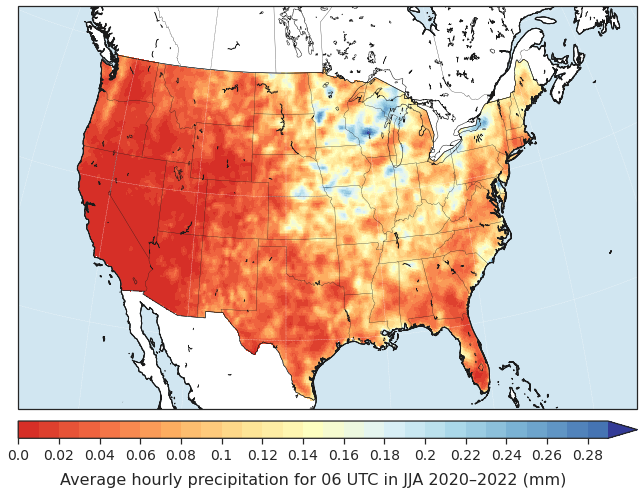

<Figure size 432x288 with 0 Axes>

In [8]:
# colorbar for column1

bounds = np.arange(0,0.3,0.01)
cols = plt.get_cmap('RdYlBu')(np.linspace(0.1,0.9,len(bounds)-1))#RdBu 
cmap = mpl.colors.ListedColormap(cols) 
cmap.set_over(plt.get_cmap('RdYlBu')(0.99)) 
cmap.set_under(plt.get_cmap('RdYlBu')(0)) 
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=len(bounds)-1) 
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap) 
sm.set_array([]) 

extent_lonlat = (-126, -65, 23, 51) #extent_lonlat = (-126, -65, 23, 51)
ocean_color = np.float64([209,230,241])/255

latmin, latmax =  30, 45
lonmin, lonmax = -105, -85 

sns.set(font_scale=1.7, style="dark")

fig = plt.figure(figsize=(10,8),tight_layout = True) #8,10;,tight_layout = True
ncols = 1
nrows = 1
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig)
gs.update(left = 0.1, right=0.96,top=0.9,bottom=0.2,wspace=0.1, hspace=0)
bottoms, tops, lefts, rights = gs.get_grid_positions(fig)

axes = []
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

newcoast = cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                                        edgecolor='k',facecolor='none')
newlake = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',edgecolor='k', facecolor='none')
plt.rcParams["axes.edgecolor"] = "0.15"

for i in range(nrows):
    for j in range(ncols):        

        ax= fig.add_subplot(gs[i,j], projection= ccrs.Orthographic(central_longitude=-100, central_latitude=25, globe=None))
        ax.pcolormesh(ave.longitude.values, ave.latitude.values, np.where(mask, ave.tp*1000, np.nan),transform=ccrs.PlateCarree(),cmap=cmap,norm=norm) #Regrid1Deg[0,:,:];mask_concat[0,:,:]

       
        ax.coastlines()
        ax.set_global()
        ax.set_extent(extent_lonlat, crs=ccrs.PlateCarree())
        ax.gridlines(xlocs=np.arange(-180,190,10),ylocs=np.arange(-180,190,10),linestyle="--",linewidth=0.3)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-', edgecolor='k')
        ax.add_feature(states_provinces, linewidth=0.3, linestyle='-', edgecolor='k')
        ax.add_feature(newcoast, linewidth=0.5, linestyle='-', edgecolor='k')
        ax.add_feature(newlake, linewidth=0.5, linestyle='-', edgecolor='k')
        ax.add_feature(cartopy.feature.LAND,color='w',zorder=0,edgecolor='k')
        ax.add_feature(cartopy.feature.OCEAN,color=ocean_color,zorder=0,edgecolor='k')
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='-', edgecolor='k')
        ax.add_feature(cartopy.feature.OCEAN,color=ocean_color,zorder=1)
        ax.add_feature(newcoast, linewidth=1, linestyle='-', zorder=2,edgecolor='k')

        ax.set_aspect("auto") 
        axes.append(ax)


# Create axes for the colorbar on the same place. 
cbar_ax = fig.add_axes([lefts[0],0.15,rights[0]-lefts[0],0.03]) #[left, bottom, width, height]  
cb = fig.colorbar(sm,cax=cbar_ax,orientation="horizontal",pad=0.02,ticks=bounds[::2],use_gridspec=True,extend="max",fraction=0.1) #drawedges=True, 
cb.ax.set_xticklabels(bounds[::2], size=14)
cb.ax.set_xlabel(r"Average hourly precipitation for 06 UTC in JJA 2020–2022 (mm)", size=16, labelpad=10) 

fig1 = plt.gcf()
# plt.tight_layout()
plt.show()
plt.draw()

# fig.savefig('HourlyP06utc.jpg', dpi=300, bbox_inches = "tight")